# Proj 01 - Destacando artefatos em mamografias - Ismael Marinho

In [1]:
import matplotlib.pyplot as plt
import imageio.v3 as imageio
import scipy.ndimage as ndi
from PIL import Image
from skimage import color
import numpy as np

# 1 - Dataset

O dataset inteiro possui diversas mamografias de vários pacientes separados por seus IDs, cada pasta contém duas subpastas denominadas por '0' e '1', que indicam não presença de células cancerígenas e presença de IDC respectivamente, dentro delas possuem pequenos recortes da mamografia de formato 50px por 50px que podem ser usados por um algoritmo de machine learning para indentificar a presença ou não de IDC. 

Foi escolhido o paciente de ID 8864, e abaixo está plotado de forma unida todas as imagens disponibilizadas totalizando tecnicamente a mamografia, depois foi plotado a parte com células IDC e não IDC.

In [13]:
imagens = ['todos/8864_idx5_x1001_y1501_class0.png', 'todos/8864_idx5_x1001_y1551_class0.png', 'todos/8864_idx5_x1001_y1651_class0.png', 'todos/8864_idx5_x1001_y2001_class0.png', 'todos/8864_idx5_x1001_y2201_class0.png', 'todos/8864_idx5_x1001_y2651_class0.png', 'todos/8864_idx5_x1001_y2901_class0.png', 'todos/8864_idx5_x1001_y501_class0.png', 'todos/8864_idx5_x1001_y851_class0.png', 'todos/8864_idx5_x101_y2251_class0.png', 'todos/8864_idx5_x101_y2301_class0.png', 'todos/8864_idx5_x101_y2901_class0.png', 'todos/8864_idx5_x1051_y1551_class0.png', 'todos/8864_idx5_x1051_y1601_class0.png', 'todos/8864_idx5_x1051_y1651_class0.png', 'todos/8864_idx5_x1051_y2201_class0.png', 'todos/8864_idx5_x1051_y2601_class0.png', 'todos/8864_idx5_x1051_y2751_class0.png', 'todos/8864_idx5_x1051_y2901_class0.png', 'todos/8864_idx5_x1051_y751_class0.png', 'todos/8864_idx5_x1051_y801_class0.png', 'todos/8864_idx5_x1101_y1551_class0.png', 'todos/8864_idx5_x1101_y1601_class0.png', 'todos/8864_idx5_x1101_y1651_class0.png', 'todos/8864_idx5_x1101_y1701_class0.png', 'todos/8864_idx5_x1101_y2251_class0.png', 'todos/8864_idx5_x1101_y2751_class0.png', 'todos/8864_idx5_x1101_y2901_class0.png', 'todos/8864_idx5_x1101_y701_class0.png', 'todos/8864_idx5_x1101_y751_class0.png', 'todos/8864_idx5_x1151_y1551_class0.png', 'todos/8864_idx5_x1151_y1601_class0.png', 'todos/8864_idx5_x1151_y1651_class0.png', 'todos/8864_idx5_x1151_y1701_class0.png', 'todos/8864_idx5_x1151_y2201_class0.png', 'todos/8864_idx5_x1151_y2251_class0.png', 'todos/8864_idx5_x1151_y2701_class0.png', 'todos/8864_idx5_x1151_y2901_class0.png', 'todos/8864_idx5_x1151_y551_class0.png', 'todos/8864_idx5_x1151_y601_class0.png', 'todos/8864_idx5_x1151_y651_class0.png', 'todos/8864_idx5_x1151_y701_class0.png', 'todos/8864_idx5_x1201_y1501_class0.png', 'todos/8864_idx5_x1201_y1551_class0.png', 'todos/8864_idx5_x1201_y1601_class0.png', 'todos/8864_idx5_x1201_y1651_class0.png', 'todos/8864_idx5_x1201_y1701_class0.png', 'todos/8864_idx5_x1201_y1751_class0.png', 'todos/8864_idx5_x1201_y1801_class0.png', 'todos/8864_idx5_x1201_y1901_class0.png', 'todos/8864_idx5_x1201_y2651_class0.png', 'todos/8864_idx5_x1201_y2701_class0.png', 'todos/8864_idx5_x1201_y2901_class0.png', 'todos/8864_idx5_x1201_y501_class0.png', 'todos/8864_idx5_x1201_y551_class0.png', 'todos/8864_idx5_x1251_y1501_class0.png', 'todos/8864_idx5_x1251_y1551_class0.png', 'todos/8864_idx5_x1251_y1601_class0.png', 'todos/8864_idx5_x1251_y1651_class0.png', 'todos/8864_idx5_x1251_y1801_class0.png', 'todos/8864_idx5_x1251_y1851_class0.png', 'todos/8864_idx5_x1251_y1951_class0.png', 'todos/8864_idx5_x1251_y2251_class0.png', 'todos/8864_idx5_x1251_y2301_class0.png', 'todos/8864_idx5_x1251_y2651_class0.png', 'todos/8864_idx5_x1251_y2901_class0.png', 'todos/8864_idx5_x1251_y351_class0.png', 'todos/8864_idx5_x1251_y401_class0.png', 'todos/8864_idx5_x1251_y551_class0.png', 'todos/8864_idx5_x1301_y1401_class0.png', 'todos/8864_idx5_x1301_y1451_class0.png', 'todos/8864_idx5_x1301_y1501_class0.png', 'todos/8864_idx5_x1301_y1551_class0.png', 'todos/8864_idx5_x1301_y1601_class0.png', 'todos/8864_idx5_x1301_y1701_class0.png', 'todos/8864_idx5_x1301_y1751_class0.png', 'todos/8864_idx5_x1301_y1801_class0.png', 'todos/8864_idx5_x1301_y1851_class0.png', 'todos/8864_idx5_x1301_y1901_class0.png', 'todos/8864_idx5_x1301_y1951_class0.png', 'todos/8864_idx5_x1301_y2251_class0.png', 'todos/8864_idx5_x1301_y2401_class0.png', 'todos/8864_idx5_x1301_y2601_class0.png', 'todos/8864_idx5_x1301_y2751_class0.png', 'todos/8864_idx5_x1301_y2901_class0.png', 'todos/8864_idx5_x1301_y301_class0.png', 'todos/8864_idx5_x1301_y701_class0.png', 'todos/8864_idx5_x1351_y1401_class0.png', 'todos/8864_idx5_x1351_y1451_class0.png', 'todos/8864_idx5_x1351_y1501_class0.png', 'todos/8864_idx5_x1351_y1551_class0.png', 'todos/8864_idx5_x1351_y1601_class0.png', 'todos/8864_idx5_x1351_y1651_class0.png', 'todos/8864_idx5_x1351_y1701_class0.png', 'todos/8864_idx5_x1351_y1751_class0.png', 'todos/8864_idx5_x1351_y1801_class0.png', 'todos/8864_idx5_x1351_y1851_class0.png', 'todos/8864_idx5_x1351_y1901_class0.png', 'todos/8864_idx5_x1351_y1951_class0.png', 'todos/8864_idx5_x1351_y2001_class0.png', 'todos/8864_idx5_x1351_y201_class0.png', 'todos/8864_idx5_x1351_y2201_class0.png', 'todos/8864_idx5_x1351_y2251_class0.png', 'todos/8864_idx5_x1351_y2351_class0.png', 'todos/8864_idx5_x1351_y2501_class0.png', 'todos/8864_idx5_x1351_y251_class0.png', 'todos/8864_idx5_x1351_y2601_class0.png', 'todos/8864_idx5_x1351_y2751_class0.png', 'todos/8864_idx5_x1351_y2901_class0.png', 'todos/8864_idx5_x1351_y651_class0.png', 'todos/8864_idx5_x1401_y1351_class0.png', 'todos/8864_idx5_x1401_y1401_class0.png', 'todos/8864_idx5_x1401_y151_class0.png', 'todos/8864_idx5_x1401_y1601_class0.png', 'todos/8864_idx5_x1401_y1651_class0.png', 'todos/8864_idx5_x1401_y1701_class0.png', 'todos/8864_idx5_x1401_y1751_class0.png', 'todos/8864_idx5_x1401_y1851_class0.png', 'todos/8864_idx5_x1401_y1901_class0.png', 'todos/8864_idx5_x1401_y2001_class0.png', 'todos/8864_idx5_x1401_y201_class0.png', 'todos/8864_idx5_x1401_y2051_class0.png', 'todos/8864_idx5_x1401_y2101_class0.png', 'todos/8864_idx5_x1401_y2201_class0.png', 'todos/8864_idx5_x1401_y2251_class0.png', 'todos/8864_idx5_x1401_y2551_class0.png', 'todos/8864_idx5_x1401_y2601_class0.png', 'todos/8864_idx5_x1401_y2651_class0.png', 'todos/8864_idx5_x1401_y2701_class0.png', 'todos/8864_idx5_x1401_y2751_class0.png', 'todos/8864_idx5_x1401_y2801_class0.png', 'todos/8864_idx5_x1401_y2901_class0.png', 'todos/8864_idx5_x1401_y551_class0.png', 'todos/8864_idx5_x1451_y101_class0.png', 'todos/8864_idx5_x1451_y1751_class0.png', 'todos/8864_idx5_x1451_y1801_class0.png', 'todos/8864_idx5_x1451_y1851_class0.png', 'todos/8864_idx5_x1451_y2051_class0.png', 'todos/8864_idx5_x1451_y2101_class0.png', 'todos/8864_idx5_x1451_y2301_class0.png', 'todos/8864_idx5_x1451_y2351_class0.png', 'todos/8864_idx5_x1451_y2401_class0.png', 'todos/8864_idx5_x1451_y2501_class0.png', 'todos/8864_idx5_x1451_y2551_class0.png', 'todos/8864_idx5_x1451_y2601_class1.png', 'todos/8864_idx5_x1451_y2651_class1.png', 'todos/8864_idx5_x1451_y2701_class1.png', 'todos/8864_idx5_x1451_y2751_class1.png', 'todos/8864_idx5_x1451_y2801_class1.png', 'todos/8864_idx5_x1451_y2901_class0.png', 'todos/8864_idx5_x1451_y301_class0.png', 'todos/8864_idx5_x1451_y501_class0.png', 'todos/8864_idx5_x1501_y1851_class0.png', 'todos/8864_idx5_x1501_y1901_class0.png', 'todos/8864_idx5_x1501_y2251_class0.png', 'todos/8864_idx5_x1501_y2301_class0.png', 'todos/8864_idx5_x1501_y2351_class0.png', 'todos/8864_idx5_x1501_y2401_class0.png', 'todos/8864_idx5_x1501_y2451_class0.png', 'todos/8864_idx5_x1501_y2501_class0.png', 'todos/8864_idx5_x1501_y2551_class1.png', 'todos/8864_idx5_x1501_y2601_class1.png', 'todos/8864_idx5_x1501_y2651_class1.png', 'todos/8864_idx5_x1501_y2701_class1.png', 'todos/8864_idx5_x1501_y2751_class1.png', 'todos/8864_idx5_x1501_y2801_class1.png', 'todos/8864_idx5_x1501_y2901_class0.png', 'todos/8864_idx5_x1501_y451_class0.png', 'todos/8864_idx5_x1501_y701_class0.png', 'todos/8864_idx5_x151_y2101_class0.png', 'todos/8864_idx5_x151_y2251_class0.png', 'todos/8864_idx5_x151_y2301_class0.png', 'todos/8864_idx5_x151_y2901_class0.png', 'todos/8864_idx5_x1551_y1251_class0.png', 'todos/8864_idx5_x1551_y1901_class0.png', 'todos/8864_idx5_x1551_y1951_class0.png', 'todos/8864_idx5_x1551_y2001_class0.png', 'todos/8864_idx5_x1551_y2251_class0.png', 'todos/8864_idx5_x1551_y2301_class0.png', 'todos/8864_idx5_x1551_y2351_class0.png', 'todos/8864_idx5_x1551_y2401_class1.png', 'todos/8864_idx5_x1551_y2451_class1.png', 'todos/8864_idx5_x1551_y2501_class1.png', 'todos/8864_idx5_x1551_y2551_class1.png', 'todos/8864_idx5_x1551_y2601_class1.png', 'todos/8864_idx5_x1551_y2651_class1.png', 'todos/8864_idx5_x1551_y2701_class1.png', 'todos/8864_idx5_x1551_y2751_class1.png', 'todos/8864_idx5_x1551_y2801_class1.png', 'todos/8864_idx5_x1551_y2901_class0.png', 'todos/8864_idx5_x1551_y401_class0.png', 'todos/8864_idx5_x1551_y51_class0.png', 'todos/8864_idx5_x1601_y1151_class0.png', 'todos/8864_idx5_x1601_y1201_class0.png', 'todos/8864_idx5_x1601_y1251_class0.png', 'todos/8864_idx5_x1601_y1_class0.png', 'todos/8864_idx5_x1601_y2001_class0.png', 'todos/8864_idx5_x1601_y2251_class0.png', 'todos/8864_idx5_x1601_y2301_class0.png', 'todos/8864_idx5_x1601_y2351_class1.png', 'todos/8864_idx5_x1601_y2401_class1.png', 'todos/8864_idx5_x1601_y2451_class1.png', 'todos/8864_idx5_x1601_y2501_class1.png', 'todos/8864_idx5_x1601_y2551_class1.png', 'todos/8864_idx5_x1601_y2601_class1.png', 'todos/8864_idx5_x1601_y2651_class1.png', 'todos/8864_idx5_x1601_y2701_class1.png', 'todos/8864_idx5_x1601_y2751_class1.png', 'todos/8864_idx5_x1601_y2801_class1.png', 'todos/8864_idx5_x1601_y2901_class0.png', 'todos/8864_idx5_x1651_y1051_class0.png', 'todos/8864_idx5_x1651_y1101_class0.png', 'todos/8864_idx5_x1651_y1151_class0.png', 'todos/8864_idx5_x1651_y1201_class0.png', 'todos/8864_idx5_x1651_y1551_class0.png', 'todos/8864_idx5_x1651_y1901_class0.png', 'todos/8864_idx5_x1651_y1951_class0.png', 'todos/8864_idx5_x1651_y2001_class0.png', 'todos/8864_idx5_x1651_y2051_class0.png', 'todos/8864_idx5_x1651_y2151_class0.png', 'todos/8864_idx5_x1651_y2201_class0.png', 'todos/8864_idx5_x1651_y2251_class1.png', 'todos/8864_idx5_x1651_y2301_class1.png', 'todos/8864_idx5_x1651_y2351_class1.png', 'todos/8864_idx5_x1651_y2401_class1.png', 'todos/8864_idx5_x1651_y2451_class1.png', 'todos/8864_idx5_x1651_y2501_class1.png', 'todos/8864_idx5_x1651_y251_class0.png', 'todos/8864_idx5_x1651_y2551_class1.png', 'todos/8864_idx5_x1651_y2601_class1.png', 'todos/8864_idx5_x1651_y2651_class1.png', 'todos/8864_idx5_x1651_y2701_class1.png', 'todos/8864_idx5_x1651_y2751_class1.png', 'todos/8864_idx5_x1651_y2901_class0.png', 'todos/8864_idx5_x1701_y1001_class0.png', 'todos/8864_idx5_x1701_y1051_class0.png', 'todos/8864_idx5_x1701_y1101_class0.png', 'todos/8864_idx5_x1701_y1151_class0.png', 'todos/8864_idx5_x1701_y1201_class0.png', 'todos/8864_idx5_x1701_y151_class0.png', 'todos/8864_idx5_x1701_y2001_class0.png', 'todos/8864_idx5_x1701_y2051_class0.png', 'todos/8864_idx5_x1701_y2151_class0.png', 'todos/8864_idx5_x1701_y2201_class0.png', 'todos/8864_idx5_x1701_y2251_class1.png', 'todos/8864_idx5_x1701_y2301_class1.png', 'todos/8864_idx5_x1701_y2351_class1.png', 'todos/8864_idx5_x1701_y2401_class1.png', 'todos/8864_idx5_x1701_y2451_class1.png', 'todos/8864_idx5_x1701_y2501_class1.png', 'todos/8864_idx5_x1701_y2551_class1.png', 'todos/8864_idx5_x1701_y2601_class1.png', 'todos/8864_idx5_x1701_y2651_class1.png', 'todos/8864_idx5_x1701_y2701_class1.png', 'todos/8864_idx5_x1701_y2751_class1.png', 'todos/8864_idx5_x1701_y2901_class0.png', 'todos/8864_idx5_x1751_y1001_class0.png', 'todos/8864_idx5_x1751_y1051_class0.png', 'todos/8864_idx5_x1751_y1101_class0.png', 'todos/8864_idx5_x1751_y1151_class0.png', 'todos/8864_idx5_x1751_y1201_class0.png', 'todos/8864_idx5_x1751_y151_class0.png', 'todos/8864_idx5_x1751_y1801_class0.png', 'todos/8864_idx5_x1751_y1851_class0.png', 'todos/8864_idx5_x1751_y1901_class0.png', 'todos/8864_idx5_x1751_y1951_class0.png', 'todos/8864_idx5_x1751_y2001_class0.png', 'todos/8864_idx5_x1751_y2051_class0.png', 'todos/8864_idx5_x1751_y2101_class0.png', 'todos/8864_idx5_x1751_y2151_class0.png', 'todos/8864_idx5_x1751_y2201_class1.png', 'todos/8864_idx5_x1751_y2251_class1.png', 'todos/8864_idx5_x1751_y2301_class1.png', 'todos/8864_idx5_x1751_y2351_class1.png', 'todos/8864_idx5_x1751_y2401_class1.png', 'todos/8864_idx5_x1751_y2451_class1.png', 'todos/8864_idx5_x1751_y2501_class1.png', 'todos/8864_idx5_x1751_y2551_class1.png', 'todos/8864_idx5_x1751_y2601_class1.png', 'todos/8864_idx5_x1751_y2651_class1.png', 'todos/8864_idx5_x1751_y2701_class1.png', 'todos/8864_idx5_x1751_y2751_class1.png', 'todos/8864_idx5_x1751_y2901_class0.png', 'todos/8864_idx5_x1801_y1001_class0.png', 'todos/8864_idx5_x1801_y101_class0.png', 'todos/8864_idx5_x1801_y1451_class0.png', 'todos/8864_idx5_x1801_y151_class0.png', 'todos/8864_idx5_x1801_y2001_class0.png', 'todos/8864_idx5_x1801_y201_class0.png', 'todos/8864_idx5_x1801_y2051_class0.png', 'todos/8864_idx5_x1801_y2101_class1.png', 'todos/8864_idx5_x1801_y2151_class1.png', 'todos/8864_idx5_x1801_y2201_class1.png', 'todos/8864_idx5_x1801_y2251_class1.png', 'todos/8864_idx5_x1801_y2301_class1.png', 'todos/8864_idx5_x1801_y2351_class1.png', 'todos/8864_idx5_x1801_y2401_class1.png', 'todos/8864_idx5_x1801_y2451_class1.png', 'todos/8864_idx5_x1801_y2501_class1.png', 'todos/8864_idx5_x1801_y2551_class1.png', 'todos/8864_idx5_x1801_y2601_class1.png', 'todos/8864_idx5_x1801_y2651_class1.png', 'todos/8864_idx5_x1801_y2701_class1.png', 'todos/8864_idx5_x1801_y2751_class1.png', 'todos/8864_idx5_x1801_y2901_class0.png', 'todos/8864_idx5_x1801_y301_class0.png', 'todos/8864_idx5_x1801_y901_class0.png', 'todos/8864_idx5_x1801_y951_class0.png', 'todos/8864_idx5_x1851_y1401_class0.png', 'todos/8864_idx5_x1851_y1601_class0.png', 'todos/8864_idx5_x1851_y1_class0.png', 'todos/8864_idx5_x1851_y2001_class1.png', 'todos/8864_idx5_x1851_y2051_class1.png', 'todos/8864_idx5_x1851_y2101_class1.png', 'todos/8864_idx5_x1851_y2151_class1.png', 'todos/8864_idx5_x1851_y2201_class1.png', 'todos/8864_idx5_x1851_y2251_class1.png', 'todos/8864_idx5_x1851_y2301_class1.png', 'todos/8864_idx5_x1851_y2351_class1.png', 'todos/8864_idx5_x1851_y2401_class1.png', 'todos/8864_idx5_x1851_y2451_class1.png', 'todos/8864_idx5_x1851_y2501_class1.png', 'todos/8864_idx5_x1851_y2551_class1.png', 'todos/8864_idx5_x1851_y2601_class1.png', 'todos/8864_idx5_x1851_y2651_class1.png', 'todos/8864_idx5_x1851_y2701_class1.png', 'todos/8864_idx5_x1851_y2751_class1.png', 'todos/8864_idx5_x1851_y2901_class0.png', 'todos/8864_idx5_x1851_y51_class0.png', 'todos/8864_idx5_x1851_y851_class0.png', 'todos/8864_idx5_x1851_y901_class0.png', 'todos/8864_idx5_x1851_y951_class0.png', 'todos/8864_idx5_x1901_y1601_class0.png', 'todos/8864_idx5_x1901_y1951_class0.png', 'todos/8864_idx5_x1901_y2001_class1.png', 'todos/8864_idx5_x1901_y2051_class1.png', 'todos/8864_idx5_x1901_y2101_class1.png', 'todos/8864_idx5_x1901_y2151_class1.png', 'todos/8864_idx5_x1901_y2201_class1.png', 'todos/8864_idx5_x1901_y2251_class1.png', 'todos/8864_idx5_x1901_y2301_class1.png', 'todos/8864_idx5_x1901_y2351_class1.png', 'todos/8864_idx5_x1901_y2401_class1.png', 'todos/8864_idx5_x1901_y2451_class1.png', 'todos/8864_idx5_x1901_y2501_class1.png', 'todos/8864_idx5_x1901_y2551_class1.png', 'todos/8864_idx5_x1901_y2601_class1.png', 'todos/8864_idx5_x1901_y2651_class1.png', 'todos/8864_idx5_x1901_y2701_class1.png', 'todos/8864_idx5_x1901_y2751_class1.png', 'todos/8864_idx5_x1901_y2901_class0.png', 'todos/8864_idx5_x1901_y51_class0.png', 'todos/8864_idx5_x1901_y801_class0.png', 'todos/8864_idx5_x1901_y851_class0.png', 'todos/8864_idx5_x1901_y901_class0.png', 'todos/8864_idx5_x1901_y951_class0.png', 'todos/8864_idx5_x1951_y1151_class0.png', 'todos/8864_idx5_x1951_y151_class0.png', 'todos/8864_idx5_x1951_y1901_class0.png', 'todos/8864_idx5_x1951_y1951_class0.png', 'todos/8864_idx5_x1951_y1_class0.png', 'todos/8864_idx5_x1951_y2001_class1.png', 'todos/8864_idx5_x1951_y2051_class1.png', 'todos/8864_idx5_x1951_y2101_class1.png', 'todos/8864_idx5_x1951_y2151_class1.png', 'todos/8864_idx5_x1951_y2201_class1.png', 'todos/8864_idx5_x1951_y2251_class1.png', 'todos/8864_idx5_x1951_y2301_class1.png', 'todos/8864_idx5_x1951_y2351_class1.png', 'todos/8864_idx5_x1951_y2401_class1.png', 'todos/8864_idx5_x1951_y2451_class1.png', 'todos/8864_idx5_x1951_y2501_class1.png', 'todos/8864_idx5_x1951_y2551_class1.png', 'todos/8864_idx5_x1951_y2601_class1.png', 'todos/8864_idx5_x1951_y2651_class1.png', 'todos/8864_idx5_x1951_y2701_class1.png', 'todos/8864_idx5_x1951_y2751_class1.png', 'todos/8864_idx5_x1951_y2901_class0.png', 'todos/8864_idx5_x1951_y451_class0.png', 'todos/8864_idx5_x1951_y751_class0.png', 'todos/8864_idx5_x1951_y801_class0.png', 'todos/8864_idx5_x1951_y851_class0.png', 'todos/8864_idx5_x1_y2251_class0.png', 'todos/8864_idx5_x1_y2901_class0.png', 'todos/8864_idx5_x2001_y151_class0.png', 'todos/8864_idx5_x2001_y1901_class0.png', 'todos/8864_idx5_x2001_y1951_class0.png', 'todos/8864_idx5_x2001_y1_class0.png', 'todos/8864_idx5_x2001_y2001_class1.png', 'todos/8864_idx5_x2001_y2051_class1.png', 'todos/8864_idx5_x2001_y2101_class1.png', 'todos/8864_idx5_x2001_y2151_class1.png', 'todos/8864_idx5_x2001_y2201_class1.png', 'todos/8864_idx5_x2001_y2251_class1.png', 'todos/8864_idx5_x2001_y2301_class1.png', 'todos/8864_idx5_x2001_y2351_class1.png', 'todos/8864_idx5_x2001_y2401_class1.png', 'todos/8864_idx5_x2001_y2451_class1.png', 'todos/8864_idx5_x2001_y2501_class1.png', 'todos/8864_idx5_x2001_y2551_class1.png', 'todos/8864_idx5_x2001_y2601_class1.png', 'todos/8864_idx5_x2001_y2651_class1.png', 'todos/8864_idx5_x2001_y2701_class1.png', 'todos/8864_idx5_x2001_y2751_class1.png', 'todos/8864_idx5_x2001_y2901_class0.png', 'todos/8864_idx5_x2001_y701_class0.png', 'todos/8864_idx5_x2001_y751_class0.png', 'todos/8864_idx5_x2001_y801_class0.png', 'todos/8864_idx5_x201_y1701_class0.png', 'todos/8864_idx5_x201_y2251_class0.png', 'todos/8864_idx5_x201_y2301_class0.png', 'todos/8864_idx5_x201_y2351_class0.png', 'todos/8864_idx5_x201_y2451_class0.png', 'todos/8864_idx5_x201_y2901_class0.png', 'todos/8864_idx5_x2051_y1901_class0.png', 'todos/8864_idx5_x2051_y1951_class0.png', 'todos/8864_idx5_x2051_y2001_class1.png', 'todos/8864_idx5_x2051_y2051_class1.png', 'todos/8864_idx5_x2051_y2101_class1.png', 'todos/8864_idx5_x2051_y2151_class1.png', 'todos/8864_idx5_x2051_y2201_class1.png', 'todos/8864_idx5_x2051_y2251_class1.png', 'todos/8864_idx5_x2051_y2301_class1.png', 'todos/8864_idx5_x2051_y2351_class1.png', 'todos/8864_idx5_x2051_y2401_class1.png', 'todos/8864_idx5_x2051_y2451_class1.png', 'todos/8864_idx5_x2051_y2501_class1.png', 'todos/8864_idx5_x2051_y2551_class1.png', 'todos/8864_idx5_x2051_y2601_class1.png', 'todos/8864_idx5_x2051_y2651_class1.png', 'todos/8864_idx5_x2051_y2701_class1.png', 'todos/8864_idx5_x2051_y2751_class1.png', 'todos/8864_idx5_x2051_y2901_class0.png', 'todos/8864_idx5_x2051_y651_class0.png', 'todos/8864_idx5_x2051_y701_class0.png', 'todos/8864_idx5_x2051_y751_class0.png', 'todos/8864_idx5_x2101_y1701_class0.png', 'todos/8864_idx5_x2101_y1951_class1.png', 'todos/8864_idx5_x2101_y2001_class1.png', 'todos/8864_idx5_x2101_y2051_class1.png', 'todos/8864_idx5_x2101_y2101_class1.png', 'todos/8864_idx5_x2101_y2151_class1.png', 'todos/8864_idx5_x2101_y2201_class1.png', 'todos/8864_idx5_x2101_y2251_class1.png', 'todos/8864_idx5_x2101_y2301_class1.png', 'todos/8864_idx5_x2101_y2351_class1.png', 'todos/8864_idx5_x2101_y2401_class1.png', 'todos/8864_idx5_x2101_y2451_class1.png', 'todos/8864_idx5_x2101_y2501_class1.png', 'todos/8864_idx5_x2101_y2551_class1.png', 'todos/8864_idx5_x2101_y2601_class1.png', 'todos/8864_idx5_x2101_y2651_class1.png', 'todos/8864_idx5_x2101_y2701_class1.png', 'todos/8864_idx5_x2101_y2751_class1.png', 'todos/8864_idx5_x2101_y2801_class1.png', 'todos/8864_idx5_x2101_y2901_class0.png', 'todos/8864_idx5_x2101_y601_class0.png', 'todos/8864_idx5_x2101_y651_class0.png', 'todos/8864_idx5_x2101_y701_class0.png', 'todos/8864_idx5_x2151_y1001_class0.png', 'todos/8864_idx5_x2151_y1751_class0.png', 'todos/8864_idx5_x2151_y1951_class1.png', 'todos/8864_idx5_x2151_y2001_class1.png', 'todos/8864_idx5_x2151_y2051_class1.png', 'todos/8864_idx5_x2151_y2101_class1.png', 'todos/8864_idx5_x2151_y2151_class1.png', 'todos/8864_idx5_x2151_y2201_class1.png', 'todos/8864_idx5_x2151_y2251_class1.png', 'todos/8864_idx5_x2151_y2301_class1.png', 'todos/8864_idx5_x2151_y2351_class1.png', 'todos/8864_idx5_x2151_y2401_class1.png', 'todos/8864_idx5_x2151_y2451_class1.png', 'todos/8864_idx5_x2151_y2501_class1.png', 'todos/8864_idx5_x2151_y2551_class1.png', 'todos/8864_idx5_x2151_y2601_class1.png', 'todos/8864_idx5_x2151_y2651_class1.png', 'todos/8864_idx5_x2151_y2701_class1.png', 'todos/8864_idx5_x2151_y2751_class1.png', 'todos/8864_idx5_x2151_y2801_class1.png', 'todos/8864_idx5_x2151_y2901_class0.png', 'todos/8864_idx5_x2151_y601_class0.png', 'todos/8864_idx5_x2151_y651_class0.png', 'todos/8864_idx5_x2201_y1751_class0.png', 'todos/8864_idx5_x2201_y1901_class1.png', 'todos/8864_idx5_x2201_y1951_class1.png', 'todos/8864_idx5_x2201_y2001_class1.png', 'todos/8864_idx5_x2201_y2051_class1.png', 'todos/8864_idx5_x2201_y2101_class1.png', 'todos/8864_idx5_x2201_y2151_class1.png', 'todos/8864_idx5_x2201_y2201_class1.png', 'todos/8864_idx5_x2201_y2251_class1.png', 'todos/8864_idx5_x2201_y2301_class1.png', 'todos/8864_idx5_x2201_y2351_class1.png', 'todos/8864_idx5_x2201_y2401_class1.png', 'todos/8864_idx5_x2201_y2451_class1.png', 'todos/8864_idx5_x2201_y2501_class1.png', 'todos/8864_idx5_x2201_y2551_class1.png', 'todos/8864_idx5_x2201_y2601_class1.png', 'todos/8864_idx5_x2201_y2651_class1.png', 'todos/8864_idx5_x2201_y2701_class1.png', 'todos/8864_idx5_x2201_y2751_class1.png', 'todos/8864_idx5_x2201_y2801_class1.png', 'todos/8864_idx5_x2201_y2901_class0.png', 'todos/8864_idx5_x2201_y551_class0.png', 'todos/8864_idx5_x2201_y601_class0.png', 'todos/8864_idx5_x2201_y651_class0.png', 'todos/8864_idx5_x2251_y1701_class0.png', 'todos/8864_idx5_x2251_y1751_class0.png', 'todos/8864_idx5_x2251_y1901_class1.png', 'todos/8864_idx5_x2251_y1951_class1.png', 'todos/8864_idx5_x2251_y2001_class1.png', 'todos/8864_idx5_x2251_y2051_class1.png', 'todos/8864_idx5_x2251_y2101_class1.png', 'todos/8864_idx5_x2251_y2151_class1.png', 'todos/8864_idx5_x2251_y2201_class1.png', 'todos/8864_idx5_x2251_y2251_class1.png', 'todos/8864_idx5_x2251_y2301_class1.png', 'todos/8864_idx5_x2251_y2351_class1.png', 'todos/8864_idx5_x2251_y2401_class1.png', 'todos/8864_idx5_x2251_y2451_class1.png', 'todos/8864_idx5_x2251_y2501_class1.png', 'todos/8864_idx5_x2251_y2551_class1.png', 'todos/8864_idx5_x2251_y2601_class1.png', 'todos/8864_idx5_x2251_y2651_class1.png', 'todos/8864_idx5_x2251_y2701_class1.png', 'todos/8864_idx5_x2251_y2751_class1.png', 'todos/8864_idx5_x2251_y2801_class1.png', 'todos/8864_idx5_x2251_y2851_class1.png', 'todos/8864_idx5_x2251_y2901_class0.png', 'todos/8864_idx5_x2251_y551_class0.png', 'todos/8864_idx5_x2251_y601_class0.png', 'todos/8864_idx5_x2251_y751_class0.png', 'todos/8864_idx5_x2301_y1701_class0.png', 'todos/8864_idx5_x2301_y1901_class1.png', 'todos/8864_idx5_x2301_y1951_class1.png', 'todos/8864_idx5_x2301_y2001_class1.png', 'todos/8864_idx5_x2301_y2051_class1.png', 'todos/8864_idx5_x2301_y2101_class1.png', 'todos/8864_idx5_x2301_y2151_class1.png', 'todos/8864_idx5_x2301_y2201_class1.png', 'todos/8864_idx5_x2301_y2251_class1.png', 'todos/8864_idx5_x2301_y2301_class1.png', 'todos/8864_idx5_x2301_y2351_class1.png', 'todos/8864_idx5_x2301_y2401_class1.png', 'todos/8864_idx5_x2301_y2451_class1.png', 'todos/8864_idx5_x2301_y2501_class1.png', 'todos/8864_idx5_x2301_y2551_class1.png', 'todos/8864_idx5_x2301_y2601_class1.png', 'todos/8864_idx5_x2301_y2651_class1.png', 'todos/8864_idx5_x2301_y2701_class1.png', 'todos/8864_idx5_x2301_y2751_class1.png', 'todos/8864_idx5_x2301_y2801_class1.png', 'todos/8864_idx5_x2301_y2851_class1.png', 'todos/8864_idx5_x2301_y2901_class0.png', 'todos/8864_idx5_x2301_y451_class0.png', 'todos/8864_idx5_x2301_y501_class0.png', 'todos/8864_idx5_x2301_y551_class0.png', 'todos/8864_idx5_x2351_y1651_class0.png', 'todos/8864_idx5_x2351_y1701_class0.png', 'todos/8864_idx5_x2351_y1751_class0.png', 'todos/8864_idx5_x2351_y1801_class0.png', 'todos/8864_idx5_x2351_y1851_class1.png', 'todos/8864_idx5_x2351_y1901_class1.png', 'todos/8864_idx5_x2351_y1951_class1.png', 'todos/8864_idx5_x2351_y2001_class1.png', 'todos/8864_idx5_x2351_y2051_class1.png', 'todos/8864_idx5_x2351_y2101_class1.png', 'todos/8864_idx5_x2351_y2151_class1.png', 'todos/8864_idx5_x2351_y2201_class1.png', 'todos/8864_idx5_x2351_y2251_class1.png', 'todos/8864_idx5_x2351_y2301_class1.png', 'todos/8864_idx5_x2351_y2351_class1.png', 'todos/8864_idx5_x2351_y2401_class1.png', 'todos/8864_idx5_x2351_y2451_class1.png', 'todos/8864_idx5_x2351_y2501_class1.png', 'todos/8864_idx5_x2351_y2551_class1.png', 'todos/8864_idx5_x2351_y2601_class1.png', 'todos/8864_idx5_x2351_y2651_class1.png', 'todos/8864_idx5_x2351_y2701_class1.png', 'todos/8864_idx5_x2351_y2751_class1.png', 'todos/8864_idx5_x2351_y2801_class1.png', 'todos/8864_idx5_x2351_y2851_class1.png', 'todos/8864_idx5_x2351_y2901_class1.png', 'todos/8864_idx5_x2351_y451_class0.png', 'todos/8864_idx5_x2351_y501_class0.png', 'todos/8864_idx5_x2351_y551_class0.png', 'todos/8864_idx5_x2401_y1501_class0.png', 'todos/8864_idx5_x2401_y1601_class0.png', 'todos/8864_idx5_x2401_y1701_class0.png', 'todos/8864_idx5_x2401_y1751_class0.png', 'todos/8864_idx5_x2401_y1901_class1.png', 'todos/8864_idx5_x2401_y1951_class1.png', 'todos/8864_idx5_x2401_y2001_class1.png', 'todos/8864_idx5_x2401_y2051_class1.png', 'todos/8864_idx5_x2401_y2101_class1.png', 'todos/8864_idx5_x2401_y2151_class1.png', 'todos/8864_idx5_x2401_y2201_class1.png', 'todos/8864_idx5_x2401_y2251_class1.png', 'todos/8864_idx5_x2401_y2301_class1.png', 'todos/8864_idx5_x2401_y2351_class1.png', 'todos/8864_idx5_x2401_y2401_class1.png', 'todos/8864_idx5_x2401_y2451_class1.png', 'todos/8864_idx5_x2401_y2501_class1.png', 'todos/8864_idx5_x2401_y2551_class1.png', 'todos/8864_idx5_x2401_y2601_class1.png', 'todos/8864_idx5_x2401_y2651_class1.png', 'todos/8864_idx5_x2401_y2701_class1.png', 'todos/8864_idx5_x2401_y2751_class1.png', 'todos/8864_idx5_x2401_y2801_class1.png', 'todos/8864_idx5_x2401_y2851_class1.png', 'todos/8864_idx5_x2401_y2901_class1.png', 'todos/8864_idx5_x2401_y451_class0.png', 'todos/8864_idx5_x2401_y501_class0.png', 'todos/8864_idx5_x2401_y551_class0.png', 'todos/8864_idx5_x2451_y1701_class0.png', 'todos/8864_idx5_x2451_y1751_class0.png', 'todos/8864_idx5_x2451_y1851_class0.png', 'todos/8864_idx5_x2451_y1901_class1.png', 'todos/8864_idx5_x2451_y1951_class1.png', 'todos/8864_idx5_x2451_y2001_class1.png', 'todos/8864_idx5_x2451_y2051_class1.png', 'todos/8864_idx5_x2451_y2101_class1.png', 'todos/8864_idx5_x2451_y2151_class1.png', 'todos/8864_idx5_x2451_y2201_class1.png', 'todos/8864_idx5_x2451_y2251_class1.png', 'todos/8864_idx5_x2451_y2301_class1.png', 'todos/8864_idx5_x2451_y2351_class1.png', 'todos/8864_idx5_x2451_y2401_class1.png', 'todos/8864_idx5_x2451_y2451_class1.png', 'todos/8864_idx5_x2451_y2501_class1.png', 'todos/8864_idx5_x2451_y2551_class1.png', 'todos/8864_idx5_x2451_y2601_class1.png', 'todos/8864_idx5_x2451_y2651_class1.png', 'todos/8864_idx5_x2451_y2701_class1.png', 'todos/8864_idx5_x2451_y2751_class1.png', 'todos/8864_idx5_x2451_y2801_class1.png', 'todos/8864_idx5_x2451_y2851_class1.png', 'todos/8864_idx5_x2451_y2901_class0.png', 'todos/8864_idx5_x2451_y451_class0.png', 'todos/8864_idx5_x2451_y501_class0.png', 'todos/8864_idx5_x2501_y1801_class0.png', 'todos/8864_idx5_x2501_y1851_class0.png', 'todos/8864_idx5_x2501_y1901_class0.png', 'todos/8864_idx5_x2501_y1951_class1.png', 'todos/8864_idx5_x2501_y2101_class0.png', 'todos/8864_idx5_x2501_y2151_class0.png', 'todos/8864_idx5_x2501_y2201_class0.png', 'todos/8864_idx5_x2501_y2251_class1.png', 'todos/8864_idx5_x2501_y2301_class1.png', 'todos/8864_idx5_x2501_y2351_class1.png', 'todos/8864_idx5_x2501_y2401_class1.png', 'todos/8864_idx5_x2501_y2451_class1.png', 'todos/8864_idx5_x2501_y2501_class1.png', 'todos/8864_idx5_x2501_y2551_class1.png', 'todos/8864_idx5_x2501_y2601_class1.png', 'todos/8864_idx5_x2501_y2651_class1.png', 'todos/8864_idx5_x2501_y2701_class1.png', 'todos/8864_idx5_x2501_y2751_class1.png', 'todos/8864_idx5_x2501_y2801_class0.png', 'todos/8864_idx5_x2501_y2851_class0.png', 'todos/8864_idx5_x2501_y2901_class0.png', 'todos/8864_idx5_x2501_y451_class0.png', 'todos/8864_idx5_x2501_y501_class0.png', 'todos/8864_idx5_x2501_y551_class0.png', 'todos/8864_idx5_x251_y1651_class0.png', 'todos/8864_idx5_x251_y1701_class0.png', 'todos/8864_idx5_x251_y2251_class0.png', 'todos/8864_idx5_x251_y2301_class0.png', 'todos/8864_idx5_x251_y2351_class0.png', 'todos/8864_idx5_x251_y2901_class0.png', 'todos/8864_idx5_x2551_y1751_class0.png', 'todos/8864_idx5_x2551_y1801_class0.png', 'todos/8864_idx5_x2551_y1851_class0.png', 'todos/8864_idx5_x2551_y1901_class0.png', 'todos/8864_idx5_x2551_y2151_class0.png', 'todos/8864_idx5_x2551_y2201_class0.png', 'todos/8864_idx5_x2551_y2251_class0.png', 'todos/8864_idx5_x2551_y2301_class0.png', 'todos/8864_idx5_x2551_y2351_class0.png', 'todos/8864_idx5_x2551_y2401_class0.png', 'todos/8864_idx5_x2551_y2451_class0.png', 'todos/8864_idx5_x2551_y2501_class0.png', 'todos/8864_idx5_x2551_y2551_class0.png', 'todos/8864_idx5_x2551_y2601_class0.png', 'todos/8864_idx5_x2551_y2651_class0.png', 'todos/8864_idx5_x2551_y2701_class0.png', 'todos/8864_idx5_x2551_y2901_class0.png', 'todos/8864_idx5_x2551_y401_class0.png', 'todos/8864_idx5_x2551_y451_class0.png', 'todos/8864_idx5_x2551_y501_class0.png', 'todos/8864_idx5_x2551_y551_class0.png', 'todos/8864_idx5_x2601_y1451_class0.png', 'todos/8864_idx5_x2601_y1501_class0.png', 'todos/8864_idx5_x2601_y1751_class0.png', 'todos/8864_idx5_x2601_y1801_class0.png', 'todos/8864_idx5_x2601_y1851_class0.png', 'todos/8864_idx5_x2601_y1901_class0.png', 'todos/8864_idx5_x2601_y2151_class0.png', 'todos/8864_idx5_x2601_y2201_class0.png', 'todos/8864_idx5_x2601_y2251_class0.png', 'todos/8864_idx5_x2601_y2301_class0.png', 'todos/8864_idx5_x2601_y2351_class0.png', 'todos/8864_idx5_x2601_y2401_class0.png', 'todos/8864_idx5_x2601_y2451_class0.png', 'todos/8864_idx5_x2601_y2501_class0.png', 'todos/8864_idx5_x2601_y2851_class0.png', 'todos/8864_idx5_x2601_y2901_class0.png', 'todos/8864_idx5_x2601_y401_class0.png', 'todos/8864_idx5_x2601_y451_class0.png', 'todos/8864_idx5_x2601_y501_class0.png', 'todos/8864_idx5_x2651_y1701_class0.png', 'todos/8864_idx5_x2651_y1751_class0.png', 'todos/8864_idx5_x2651_y1801_class0.png', 'todos/8864_idx5_x2651_y1901_class0.png', 'todos/8864_idx5_x2651_y2001_class0.png', 'todos/8864_idx5_x2651_y2101_class0.png', 'todos/8864_idx5_x2651_y2151_class0.png', 'todos/8864_idx5_x2651_y2201_class0.png', 'todos/8864_idx5_x2651_y2251_class0.png', 'todos/8864_idx5_x2651_y2301_class0.png', 'todos/8864_idx5_x2651_y2351_class0.png', 'todos/8864_idx5_x2651_y2401_class0.png', 'todos/8864_idx5_x2651_y2451_class0.png', 'todos/8864_idx5_x2651_y2651_class0.png', 'todos/8864_idx5_x2651_y2851_class0.png', 'todos/8864_idx5_x2651_y2901_class0.png', 'todos/8864_idx5_x2651_y401_class0.png', 'todos/8864_idx5_x2651_y451_class0.png', 'todos/8864_idx5_x2651_y501_class0.png', 'todos/8864_idx5_x2701_y1451_class0.png', 'todos/8864_idx5_x2701_y1701_class0.png', 'todos/8864_idx5_x2701_y1751_class0.png', 'todos/8864_idx5_x2701_y1801_class0.png', 'todos/8864_idx5_x2701_y1851_class0.png', 'todos/8864_idx5_x2701_y1901_class0.png', 'todos/8864_idx5_x2701_y1951_class0.png', 'todos/8864_idx5_x2701_y2001_class0.png', 'todos/8864_idx5_x2701_y2051_class0.png', 'todos/8864_idx5_x2701_y2101_class0.png', 'todos/8864_idx5_x2701_y2151_class0.png', 'todos/8864_idx5_x2701_y2201_class0.png', 'todos/8864_idx5_x2701_y2251_class0.png', 'todos/8864_idx5_x2701_y2301_class0.png', 'todos/8864_idx5_x2701_y2351_class0.png', 'todos/8864_idx5_x2701_y2401_class0.png', 'todos/8864_idx5_x2701_y2451_class0.png', 'todos/8864_idx5_x2701_y2601_class0.png', 'todos/8864_idx5_x2701_y2651_class0.png', 'todos/8864_idx5_x2701_y2851_class0.png', 'todos/8864_idx5_x2701_y2901_class0.png', 'todos/8864_idx5_x2701_y401_class0.png', 'todos/8864_idx5_x2701_y451_class0.png', 'todos/8864_idx5_x2751_y1401_class0.png', 'todos/8864_idx5_x2751_y1451_class0.png', 'todos/8864_idx5_x2751_y1601_class0.png', 'todos/8864_idx5_x2751_y1751_class0.png', 'todos/8864_idx5_x2751_y1801_class0.png', 'todos/8864_idx5_x2751_y1851_class0.png', 'todos/8864_idx5_x2751_y1901_class0.png', 'todos/8864_idx5_x2751_y1951_class0.png', 'todos/8864_idx5_x2751_y2001_class0.png', 'todos/8864_idx5_x2751_y2051_class0.png', 'todos/8864_idx5_x2751_y2101_class0.png', 'todos/8864_idx5_x2751_y2151_class0.png', 'todos/8864_idx5_x2751_y2201_class0.png', 'todos/8864_idx5_x2751_y2251_class0.png', 'todos/8864_idx5_x2751_y2301_class0.png', 'todos/8864_idx5_x2751_y2351_class0.png', 'todos/8864_idx5_x2751_y2401_class0.png', 'todos/8864_idx5_x2751_y2451_class0.png', 'todos/8864_idx5_x2751_y2651_class0.png', 'todos/8864_idx5_x2751_y2851_class0.png', 'todos/8864_idx5_x2751_y2901_class0.png', 'todos/8864_idx5_x2751_y451_class0.png', 'todos/8864_idx5_x2801_y1351_class0.png', 'todos/8864_idx5_x2801_y1701_class0.png', 'todos/8864_idx5_x2801_y1751_class0.png', 'todos/8864_idx5_x2801_y1801_class0.png', 'todos/8864_idx5_x2801_y1851_class0.png', 'todos/8864_idx5_x2801_y1901_class0.png', 'todos/8864_idx5_x2801_y1951_class0.png', 'todos/8864_idx5_x2801_y2001_class0.png', 'todos/8864_idx5_x2801_y2051_class0.png', 'todos/8864_idx5_x2801_y2101_class0.png', 'todos/8864_idx5_x2801_y2151_class0.png', 'todos/8864_idx5_x2801_y2251_class0.png', 'todos/8864_idx5_x2801_y2301_class0.png', 'todos/8864_idx5_x2801_y2351_class0.png', 'todos/8864_idx5_x2801_y2401_class0.png', 'todos/8864_idx5_x2801_y2551_class0.png', 'todos/8864_idx5_x2801_y2601_class0.png', 'todos/8864_idx5_x2801_y2651_class0.png', 'todos/8864_idx5_x2801_y2701_class0.png', 'todos/8864_idx5_x2801_y2801_class0.png', 'todos/8864_idx5_x2801_y2851_class0.png', 'todos/8864_idx5_x2801_y2901_class0.png', 'todos/8864_idx5_x2851_y1351_class0.png', 'todos/8864_idx5_x2851_y1651_class0.png', 'todos/8864_idx5_x2851_y1751_class0.png', 'todos/8864_idx5_x2851_y1801_class0.png', 'todos/8864_idx5_x2851_y1851_class0.png', 'todos/8864_idx5_x2851_y1901_class0.png', 'todos/8864_idx5_x2851_y1951_class0.png', 'todos/8864_idx5_x2851_y2001_class0.png', 'todos/8864_idx5_x2851_y2051_class0.png', 'todos/8864_idx5_x2851_y2101_class0.png', 'todos/8864_idx5_x2851_y2251_class0.png', 'todos/8864_idx5_x2851_y2301_class0.png', 'todos/8864_idx5_x2851_y2351_class0.png', 'todos/8864_idx5_x2851_y2401_class0.png', 'todos/8864_idx5_x2851_y2501_class0.png', 'todos/8864_idx5_x2851_y2651_class0.png', 'todos/8864_idx5_x2851_y2701_class0.png', 'todos/8864_idx5_x2851_y2801_class0.png', 'todos/8864_idx5_x2851_y2901_class0.png', 'todos/8864_idx5_x2901_y1201_class0.png', 'todos/8864_idx5_x2901_y1701_class0.png', 'todos/8864_idx5_x2901_y1751_class0.png', 'todos/8864_idx5_x2901_y1801_class0.png', 'todos/8864_idx5_x2901_y1851_class0.png', 'todos/8864_idx5_x2901_y2051_class0.png', 'todos/8864_idx5_x2901_y2101_class0.png', 'todos/8864_idx5_x2901_y2201_class0.png', 'todos/8864_idx5_x2901_y2251_class0.png', 'todos/8864_idx5_x2901_y2301_class0.png', 'todos/8864_idx5_x2901_y2351_class0.png', 'todos/8864_idx5_x2901_y2401_class0.png', 'todos/8864_idx5_x2901_y2451_class0.png', 'todos/8864_idx5_x2901_y2501_class0.png', 'todos/8864_idx5_x2901_y2651_class0.png', 'todos/8864_idx5_x2901_y2801_class0.png', 'todos/8864_idx5_x2901_y2901_class0.png', 'todos/8864_idx5_x2901_y701_class0.png', 'todos/8864_idx5_x2901_y751_class0.png', 'todos/8864_idx5_x2951_y1051_class0.png', 'todos/8864_idx5_x2951_y1101_class0.png', 'todos/8864_idx5_x2951_y1651_class0.png', 'todos/8864_idx5_x2951_y1701_class0.png', 'todos/8864_idx5_x2951_y1751_class0.png', 'todos/8864_idx5_x2951_y1801_class0.png', 'todos/8864_idx5_x2951_y2001_class0.png', 'todos/8864_idx5_x2951_y2051_class0.png', 'todos/8864_idx5_x2951_y2151_class0.png', 'todos/8864_idx5_x2951_y2201_class0.png', 'todos/8864_idx5_x2951_y2251_class0.png', 'todos/8864_idx5_x2951_y2301_class0.png', 'todos/8864_idx5_x2951_y2351_class0.png', 'todos/8864_idx5_x2951_y2401_class0.png', 'todos/8864_idx5_x2951_y2451_class0.png', 'todos/8864_idx5_x2951_y2501_class0.png', 'todos/8864_idx5_x2951_y2751_class0.png', 'todos/8864_idx5_x2951_y2801_class0.png', 'todos/8864_idx5_x2951_y2901_class0.png', 'todos/8864_idx5_x3001_y1001_class0.png', 'todos/8864_idx5_x3001_y1051_class0.png', 'todos/8864_idx5_x3001_y1101_class0.png', 'todos/8864_idx5_x3001_y1151_class0.png', 'todos/8864_idx5_x3001_y1651_class0.png', 'todos/8864_idx5_x3001_y1701_class0.png', 'todos/8864_idx5_x3001_y2001_class0.png', 'todos/8864_idx5_x3001_y2051_class0.png', 'todos/8864_idx5_x3001_y2151_class0.png', 'todos/8864_idx5_x3001_y2201_class0.png', 'todos/8864_idx5_x3001_y2251_class0.png', 'todos/8864_idx5_x3001_y2301_class0.png', 'todos/8864_idx5_x3001_y2351_class0.png', 'todos/8864_idx5_x3001_y2401_class0.png', 'todos/8864_idx5_x3001_y2451_class0.png', 'todos/8864_idx5_x3001_y2501_class0.png', 'todos/8864_idx5_x3001_y2701_class0.png', 'todos/8864_idx5_x3001_y2751_class0.png', 'todos/8864_idx5_x3001_y2901_class0.png', 'todos/8864_idx5_x3001_y801_class0.png', 'todos/8864_idx5_x3001_y851_class0.png', 'todos/8864_idx5_x3001_y901_class0.png', 'todos/8864_idx5_x3001_y951_class0.png', 'todos/8864_idx5_x301_y1501_class0.png', 'todos/8864_idx5_x301_y1551_class0.png', 'todos/8864_idx5_x301_y2251_class0.png', 'todos/8864_idx5_x301_y2301_class0.png', 'todos/8864_idx5_x301_y2351_class0.png', 'todos/8864_idx5_x301_y2901_class0.png', 'todos/8864_idx5_x3051_y1001_class0.png', 'todos/8864_idx5_x3051_y1051_class0.png', 'todos/8864_idx5_x3051_y1101_class0.png', 'todos/8864_idx5_x3051_y1151_class0.png', 'todos/8864_idx5_x3051_y1601_class0.png', 'todos/8864_idx5_x3051_y1651_class0.png', 'todos/8864_idx5_x3051_y1701_class0.png', 'todos/8864_idx5_x3051_y2051_class0.png', 'todos/8864_idx5_x3051_y2101_class0.png', 'todos/8864_idx5_x3051_y2151_class0.png', 'todos/8864_idx5_x3051_y2201_class0.png', 'todos/8864_idx5_x3051_y2251_class0.png', 'todos/8864_idx5_x3051_y2301_class0.png', 'todos/8864_idx5_x3051_y2351_class0.png', 'todos/8864_idx5_x3051_y2401_class0.png', 'todos/8864_idx5_x3051_y2451_class0.png', 'todos/8864_idx5_x3051_y2501_class0.png', 'todos/8864_idx5_x3051_y2901_class0.png', 'todos/8864_idx5_x3101_y1051_class0.png', 'todos/8864_idx5_x3101_y1101_class0.png', 'todos/8864_idx5_x3101_y1151_class0.png', 'todos/8864_idx5_x3101_y1551_class0.png', 'todos/8864_idx5_x3101_y1601_class0.png', 'todos/8864_idx5_x3101_y2001_class0.png', 'todos/8864_idx5_x3101_y2051_class0.png', 'todos/8864_idx5_x3101_y2101_class0.png', 'todos/8864_idx5_x3101_y2151_class0.png', 'todos/8864_idx5_x3101_y2201_class0.png', 'todos/8864_idx5_x3101_y2251_class0.png', 'todos/8864_idx5_x3101_y2301_class0.png', 'todos/8864_idx5_x3101_y2351_class0.png', 'todos/8864_idx5_x3101_y2401_class0.png', 'todos/8864_idx5_x3101_y2451_class0.png', 'todos/8864_idx5_x3101_y2501_class0.png', 'todos/8864_idx5_x3101_y2651_class0.png', 'todos/8864_idx5_x3101_y2901_class0.png', 'todos/8864_idx5_x3151_y1101_class0.png', 'todos/8864_idx5_x3151_y1151_class0.png', 'todos/8864_idx5_x3151_y1201_class0.png', 'todos/8864_idx5_x3151_y1251_class0.png', 'todos/8864_idx5_x3151_y1551_class0.png', 'todos/8864_idx5_x3151_y2001_class0.png', 'todos/8864_idx5_x3151_y2051_class0.png', 'todos/8864_idx5_x3151_y2101_class0.png', 'todos/8864_idx5_x3151_y2151_class0.png', 'todos/8864_idx5_x3151_y2201_class0.png', 'todos/8864_idx5_x3151_y2251_class0.png', 'todos/8864_idx5_x3151_y2301_class0.png', 'todos/8864_idx5_x3151_y2351_class0.png', 'todos/8864_idx5_x3151_y2401_class0.png', 'todos/8864_idx5_x3151_y2451_class0.png', 'todos/8864_idx5_x3151_y2701_class0.png', 'todos/8864_idx5_x3151_y2901_class0.png', 'todos/8864_idx5_x3201_y1151_class0.png', 'todos/8864_idx5_x3201_y1201_class0.png', 'todos/8864_idx5_x3201_y1251_class0.png', 'todos/8864_idx5_x3201_y1551_class0.png', 'todos/8864_idx5_x3201_y1901_class0.png', 'todos/8864_idx5_x3201_y2001_class0.png', 'todos/8864_idx5_x3201_y2051_class0.png', 'todos/8864_idx5_x3201_y2101_class0.png', 'todos/8864_idx5_x3201_y2151_class0.png', 'todos/8864_idx5_x3201_y2201_class0.png', 'todos/8864_idx5_x3201_y2351_class0.png', 'todos/8864_idx5_x3201_y2401_class0.png', 'todos/8864_idx5_x3201_y2451_class0.png', 'todos/8864_idx5_x3201_y2901_class0.png', 'todos/8864_idx5_x3251_y1851_class0.png', 'todos/8864_idx5_x3251_y1901_class0.png', 'todos/8864_idx5_x3251_y2001_class0.png', 'todos/8864_idx5_x3251_y2051_class0.png', 'todos/8864_idx5_x3251_y2101_class0.png', 'todos/8864_idx5_x3251_y2151_class0.png', 'todos/8864_idx5_x3251_y2201_class0.png', 'todos/8864_idx5_x3251_y2451_class0.png', 'todos/8864_idx5_x3251_y2901_class0.png', 'todos/8864_idx5_x3301_y2001_class0.png', 'todos/8864_idx5_x3301_y2051_class0.png', 'todos/8864_idx5_x3301_y2101_class0.png', 'todos/8864_idx5_x3301_y2151_class0.png', 'todos/8864_idx5_x3301_y2551_class0.png', 'todos/8864_idx5_x3301_y2901_class0.png', 'todos/8864_idx5_x3351_y2001_class0.png', 'todos/8864_idx5_x3351_y2051_class0.png', 'todos/8864_idx5_x3351_y2151_class0.png', 'todos/8864_idx5_x3351_y2751_class0.png', 'todos/8864_idx5_x3351_y2901_class0.png', 'todos/8864_idx5_x3401_y1951_class0.png', 'todos/8864_idx5_x3401_y2101_class0.png', 'todos/8864_idx5_x3401_y2701_class0.png', 'todos/8864_idx5_x3401_y2901_class0.png', 'todos/8864_idx5_x3451_y2051_class0.png', 'todos/8864_idx5_x3451_y2101_class0.png', 'todos/8864_idx5_x3451_y2401_class0.png', 'todos/8864_idx5_x3451_y2901_class0.png', 'todos/8864_idx5_x3501_y2251_class0.png', 'todos/8864_idx5_x3501_y2351_class0.png', 'todos/8864_idx5_x3501_y2901_class0.png', 'todos/8864_idx5_x351_y1401_class0.png', 'todos/8864_idx5_x351_y1501_class0.png', 'todos/8864_idx5_x351_y2251_class0.png', 'todos/8864_idx5_x351_y2301_class0.png', 'todos/8864_idx5_x351_y2351_class0.png', 'todos/8864_idx5_x351_y2901_class0.png', 'todos/8864_idx5_x3551_y1401_class0.png', 'todos/8864_idx5_x3551_y2201_class0.png', 'todos/8864_idx5_x3551_y2901_class0.png', 'todos/8864_idx5_x3601_y1401_class0.png', 'todos/8864_idx5_x3601_y2901_class0.png', 'todos/8864_idx5_x3651_y2251_class0.png', 'todos/8864_idx5_x3651_y2351_class0.png', 'todos/8864_idx5_x3651_y2901_class0.png', 'todos/8864_idx5_x3701_y2201_class0.png', 'todos/8864_idx5_x3701_y2251_class0.png', 'todos/8864_idx5_x3701_y2901_class0.png', 'todos/8864_idx5_x3751_y2201_class0.png', 'todos/8864_idx5_x3751_y2901_class0.png', 'todos/8864_idx5_x401_y1501_class0.png', 'todos/8864_idx5_x401_y1551_class0.png', 'todos/8864_idx5_x401_y2201_class0.png', 'todos/8864_idx5_x401_y2251_class0.png', 'todos/8864_idx5_x401_y2301_class0.png', 'todos/8864_idx5_x401_y2351_class0.png', 'todos/8864_idx5_x401_y2901_class0.png', 'todos/8864_idx5_x451_y1501_class0.png', 'todos/8864_idx5_x451_y1551_class0.png', 'todos/8864_idx5_x451_y2201_class0.png', 'todos/8864_idx5_x451_y2251_class0.png', 'todos/8864_idx5_x451_y2301_class0.png', 'todos/8864_idx5_x451_y2351_class0.png', 'todos/8864_idx5_x451_y2901_class0.png', 'todos/8864_idx5_x501_y1201_class0.png', 'todos/8864_idx5_x501_y2151_class0.png', 'todos/8864_idx5_x501_y2201_class0.png', 'todos/8864_idx5_x501_y2251_class0.png', 'todos/8864_idx5_x501_y2301_class0.png', 'todos/8864_idx5_x501_y2901_class0.png', 'todos/8864_idx5_x51_y2201_class0.png', 'todos/8864_idx5_x51_y2251_class0.png', 'todos/8864_idx5_x51_y2901_class0.png', 'todos/8864_idx5_x551_y1451_class0.png', 'todos/8864_idx5_x551_y2151_class0.png', 'todos/8864_idx5_x551_y2201_class0.png', 'todos/8864_idx5_x551_y2251_class0.png', 'todos/8864_idx5_x551_y2301_class0.png', 'todos/8864_idx5_x551_y2901_class0.png', 'todos/8864_idx5_x551_y51_class0.png', 'todos/8864_idx5_x601_y1451_class0.png', 'todos/8864_idx5_x601_y2151_class0.png', 'todos/8864_idx5_x601_y2201_class0.png', 'todos/8864_idx5_x601_y2251_class0.png', 'todos/8864_idx5_x601_y2301_class0.png', 'todos/8864_idx5_x601_y2901_class0.png', 'todos/8864_idx5_x651_y1101_class0.png', 'todos/8864_idx5_x651_y1351_class0.png', 'todos/8864_idx5_x651_y1401_class0.png', 'todos/8864_idx5_x651_y1901_class0.png', 'todos/8864_idx5_x651_y2001_class0.png', 'todos/8864_idx5_x651_y2101_class0.png', 'todos/8864_idx5_x651_y2151_class0.png', 'todos/8864_idx5_x651_y2201_class0.png', 'todos/8864_idx5_x651_y2251_class0.png', 'todos/8864_idx5_x651_y2301_class0.png', 'todos/8864_idx5_x651_y2901_class0.png', 'todos/8864_idx5_x701_y1051_class0.png', 'todos/8864_idx5_x701_y1301_class0.png', 'todos/8864_idx5_x701_y1351_class0.png', 'todos/8864_idx5_x701_y2001_class0.png', 'todos/8864_idx5_x701_y2051_class0.png', 'todos/8864_idx5_x701_y2101_class0.png', 'todos/8864_idx5_x701_y2151_class0.png', 'todos/8864_idx5_x701_y2201_class0.png', 'todos/8864_idx5_x701_y2251_class0.png', 'todos/8864_idx5_x701_y2301_class0.png', 'todos/8864_idx5_x701_y2901_class0.png', 'todos/8864_idx5_x751_y1001_class0.png', 'todos/8864_idx5_x751_y1751_class0.png', 'todos/8864_idx5_x751_y2001_class0.png', 'todos/8864_idx5_x751_y2051_class0.png', 'todos/8864_idx5_x751_y2101_class0.png', 'todos/8864_idx5_x751_y2151_class0.png', 'todos/8864_idx5_x751_y2201_class0.png', 'todos/8864_idx5_x751_y2901_class0.png', 'todos/8864_idx5_x801_y1051_class0.png', 'todos/8864_idx5_x801_y1101_class0.png', 'todos/8864_idx5_x801_y1151_class0.png', 'todos/8864_idx5_x801_y1201_class0.png', 'todos/8864_idx5_x801_y1701_class0.png', 'todos/8864_idx5_x801_y1851_class0.png', 'todos/8864_idx5_x801_y2001_class0.png', 'todos/8864_idx5_x801_y2051_class0.png', 'todos/8864_idx5_x801_y2101_class0.png', 'todos/8864_idx5_x801_y2151_class0.png', 'todos/8864_idx5_x801_y2201_class0.png', 'todos/8864_idx5_x801_y2251_class0.png', 'todos/8864_idx5_x801_y2301_class0.png', 'todos/8864_idx5_x801_y2701_class0.png', 'todos/8864_idx5_x801_y2901_class0.png', 'todos/8864_idx5_x851_y1001_class0.png', 'todos/8864_idx5_x851_y1051_class0.png', 'todos/8864_idx5_x851_y1101_class0.png', 'todos/8864_idx5_x851_y1151_class0.png', 'todos/8864_idx5_x851_y1201_class0.png', 'todos/8864_idx5_x851_y1651_class0.png', 'todos/8864_idx5_x851_y1701_class0.png', 'todos/8864_idx5_x851_y1751_class0.png', 'todos/8864_idx5_x851_y1801_class0.png', 'todos/8864_idx5_x851_y2001_class0.png', 'todos/8864_idx5_x851_y2051_class0.png', 'todos/8864_idx5_x851_y2101_class0.png', 'todos/8864_idx5_x851_y2151_class0.png', 'todos/8864_idx5_x851_y2201_class0.png', 'todos/8864_idx5_x851_y2251_class0.png', 'todos/8864_idx5_x851_y2301_class0.png', 'todos/8864_idx5_x851_y2651_class0.png', 'todos/8864_idx5_x851_y2701_class0.png', 'todos/8864_idx5_x851_y2751_class0.png', 'todos/8864_idx5_x851_y2901_class0.png', 'todos/8864_idx5_x851_y901_class0.png', 'todos/8864_idx5_x851_y951_class0.png', 'todos/8864_idx5_x901_y1001_class0.png', 'todos/8864_idx5_x901_y1051_class0.png', 'todos/8864_idx5_x901_y1101_class0.png', 'todos/8864_idx5_x901_y1151_class0.png', 'todos/8864_idx5_x901_y1651_class0.png', 'todos/8864_idx5_x901_y1751_class0.png', 'todos/8864_idx5_x901_y2001_class0.png', 'todos/8864_idx5_x901_y2051_class0.png', 'todos/8864_idx5_x901_y2101_class0.png', 'todos/8864_idx5_x901_y2151_class0.png', 'todos/8864_idx5_x901_y2201_class0.png', 'todos/8864_idx5_x901_y2251_class0.png', 'todos/8864_idx5_x901_y2301_class0.png', 'todos/8864_idx5_x901_y2401_class0.png', 'todos/8864_idx5_x901_y2451_class0.png', 'todos/8864_idx5_x901_y2901_class0.png', 'todos/8864_idx5_x901_y801_class0.png', 'todos/8864_idx5_x901_y851_class0.png', 'todos/8864_idx5_x901_y901_class0.png', 'todos/8864_idx5_x901_y951_class0.png', 'todos/8864_idx5_x951_y1001_class0.png', 'todos/8864_idx5_x951_y1651_class0.png', 'todos/8864_idx5_x951_y1801_class0.png', 'todos/8864_idx5_x951_y2201_class0.png', 'todos/8864_idx5_x951_y2251_class0.png', 'todos/8864_idx5_x951_y2301_class0.png', 'todos/8864_idx5_x951_y2351_class0.png', 'todos/8864_idx5_x951_y2401_class0.png', 'todos/8864_idx5_x951_y2901_class0.png', 'todos/8864_idx5_x951_y901_class0.png', 'todos/8864_idx5_x951_y951_class0.png']
imagens_coord = ['1001 1501', '1001 1551', '1001 1651', '1001 2001', '1001 2201', '1001 2651', '1001 2901', '1001 501', '1001 851', '101 2251', '101 2301', '101 2901', '1051 1551', '1051 1601', '1051 1651', '1051 2201', '1051 2601', '1051 2751', '1051 2901', '1051 751', '1051 801', '1101 1551', '1101 1601', '1101 1651', '1101 1701', '1101 2251', '1101 2751', '1101 2901', '1101 701', '1101 751', '1151 1551', '1151 1601', '1151 1651', '1151 1701', '1151 2201', '1151 2251', '1151 2701', '1151 2901', '1151 551', '1151 601', '1151 651', '1151 701', '1201 1501', '1201 1551', '1201 1601', '1201 1651', '1201 1701', '1201 1751', '1201 1801', '1201 1901', '1201 2651', '1201 2701', '1201 2901', '1201 501', '1201 551', '1251 1501', '1251 1551', '1251 1601', '1251 1651', '1251 1801', '1251 1851', '1251 1951', '1251 2251', '1251 2301', '1251 2651', '1251 2901', '1251 351', '1251 401', '1251 551', '1301 1401', '1301 1451', '1301 1501', '1301 1551', '1301 1601', '1301 1701', '1301 1751', '1301 1801', '1301 1851', '1301 1901', '1301 1951', '1301 2251', '1301 2401', '1301 2601', '1301 2751', '1301 2901', '1301 301', '1301 701', '1351 1401', '1351 1451', '1351 1501', '1351 1551', '1351 1601', '1351 1651', '1351 1701', '1351 1751', '1351 1801', '1351 1851', '1351 1901', '1351 1951', '1351 2001', '1351 201', '1351 2201', '1351 2251', '1351 2351', '1351 2501', '1351 251', '1351 2601', '1351 2751', '1351 2901', '1351 651', '1401 1351', '1401 1401', '1401 151', '1401 1601', '1401 1651', '1401 1701', '1401 1751', '1401 1851', '1401 1901', '1401 2001', '1401 201', '1401 2051', '1401 2101', '1401 2201', '1401 2251', '1401 2551', '1401 2601', '1401 2651', '1401 2701', '1401 2751', '1401 2801', '1401 2901', '1401 551', '1451 101', '1451 1751', '1451 1801', '1451 1851', '1451 2051', '1451 2101', '1451 2301', '1451 2351', '1451 2401', '1451 2501', '1451 2551', '1451 2601', '1451 2651', '1451 2701', '1451 2751', '1451 2801', '1451 2901', '1451 301', '1451 501', '1501 1851', '1501 1901', '1501 2251', '1501 2301', '1501 2351', '1501 2401', '1501 2451', '1501 2501', '1501 2551', '1501 2601', '1501 2651', '1501 2701', '1501 2751', '1501 2801', '1501 2901', '1501 451', '1501 701', '151 2101', '151 2251', '151 2301', '151 2901', '1551 1251', '1551 1901', '1551 1951', '1551 2001', '1551 2251', '1551 2301', '1551 2351', '1551 2401', '1551 2451', '1551 2501', '1551 2551', '1551 2601', '1551 2651', '1551 2701', '1551 2751', '1551 2801', '1551 2901', '1551 401', '1551 51', '1601 1151', '1601 1201', '1601 1251', '1601 1', '1601 2001', '1601 2251', '1601 2301', '1601 2351', '1601 2401', '1601 2451', '1601 2501', '1601 2551', '1601 2601', '1601 2651', '1601 2701', '1601 2751', '1601 2801', '1601 2901', '1651 1051', '1651 1101', '1651 1151', '1651 1201', '1651 1551', '1651 1901', '1651 1951', '1651 2001', '1651 2051', '1651 2151', '1651 2201', '1651 2251', '1651 2301', '1651 2351', '1651 2401', '1651 2451', '1651 2501', '1651 251', '1651 2551', '1651 2601', '1651 2651', '1651 2701', '1651 2751', '1651 2901', '1701 1001', '1701 1051', '1701 1101', '1701 1151', '1701 1201', '1701 151', '1701 2001', '1701 2051', '1701 2151', '1701 2201', '1701 2251', '1701 2301', '1701 2351', '1701 2401', '1701 2451', '1701 2501', '1701 2551', '1701 2601', '1701 2651', '1701 2701', '1701 2751', '1701 2901', '1751 1001', '1751 1051', '1751 1101', '1751 1151', '1751 1201', '1751 151', '1751 1801', '1751 1851', '1751 1901', '1751 1951', '1751 2001', '1751 2051', '1751 2101', '1751 2151', '1751 2201', '1751 2251', '1751 2301', '1751 2351', '1751 2401', '1751 2451', '1751 2501', '1751 2551', '1751 2601', '1751 2651', '1751 2701', '1751 2751', '1751 2901', '1801 1001', '1801 101', '1801 1451', '1801 151', '1801 2001', '1801 201', '1801 2051', '1801 2101', '1801 2151', '1801 2201', '1801 2251', '1801 2301', '1801 2351', '1801 2401', '1801 2451', '1801 2501', '1801 2551', '1801 2601', '1801 2651', '1801 2701', '1801 2751', '1801 2901', '1801 301', '1801 901', '1801 951', '1851 1401', '1851 1601', '1851 1', '1851 2001', '1851 2051', '1851 2101', '1851 2151', '1851 2201', '1851 2251', '1851 2301', '1851 2351', '1851 2401', '1851 2451', '1851 2501', '1851 2551', '1851 2601', '1851 2651', '1851 2701', '1851 2751', '1851 2901', '1851 51', '1851 851', '1851 901', '1851 951', '1901 1601', '1901 1951', '1901 2001', '1901 2051', '1901 2101', '1901 2151', '1901 2201', '1901 2251', '1901 2301', '1901 2351', '1901 2401', '1901 2451', '1901 2501', '1901 2551', '1901 2601', '1901 2651', '1901 2701', '1901 2751', '1901 2901', '1901 51', '1901 801', '1901 851', '1901 901', '1901 951', '1951 1151', '1951 151', '1951 1901', '1951 1951', '1951 1', '1951 2001', '1951 2051', '1951 2101', '1951 2151', '1951 2201', '1951 2251', '1951 2301', '1951 2351', '1951 2401', '1951 2451', '1951 2501', '1951 2551', '1951 2601', '1951 2651', '1951 2701', '1951 2751', '1951 2901', '1951 451', '1951 751', '1951 801', '1951 851', '1 2251', '1 2901', '2001 151', '2001 1901', '2001 1951', '2001 1', '2001 2001', '2001 2051', '2001 2101', '2001 2151', '2001 2201', '2001 2251', '2001 2301', '2001 2351', '2001 2401', '2001 2451', '2001 2501', '2001 2551', '2001 2601', '2001 2651', '2001 2701', '2001 2751', '2001 2901', '2001 701', '2001 751', '2001 801', '201 1701', '201 2251', '201 2301', '201 2351', '201 2451', '201 2901', '2051 1901', '2051 1951', '2051 2001', '2051 2051', '2051 2101', '2051 2151', '2051 2201', '2051 2251', '2051 2301', '2051 2351', '2051 2401', '2051 2451', '2051 2501', '2051 2551', '2051 2601', '2051 2651', '2051 2701', '2051 2751', '2051 2901', '2051 651', '2051 701', '2051 751', '2101 1701', '2101 1951', '2101 2001', '2101 2051', '2101 2101', '2101 2151', '2101 2201', '2101 2251', '2101 2301', '2101 2351', '2101 2401', '2101 2451', '2101 2501', '2101 2551', '2101 2601', '2101 2651', '2101 2701', '2101 2751', '2101 2801', '2101 2901', '2101 601', '2101 651', '2101 701', '2151 1001', '2151 1751', '2151 1951', '2151 2001', '2151 2051', '2151 2101', '2151 2151', '2151 2201', '2151 2251', '2151 2301', '2151 2351', '2151 2401', '2151 2451', '2151 2501', '2151 2551', '2151 2601', '2151 2651', '2151 2701', '2151 2751', '2151 2801', '2151 2901', '2151 601', '2151 651', '2201 1751', '2201 1901', '2201 1951', '2201 2001', '2201 2051', '2201 2101', '2201 2151', '2201 2201', '2201 2251', '2201 2301', '2201 2351', '2201 2401', '2201 2451', '2201 2501', '2201 2551', '2201 2601', '2201 2651', '2201 2701', '2201 2751', '2201 2801', '2201 2901', '2201 551', '2201 601', '2201 651', '2251 1701', '2251 1751', '2251 1901', '2251 1951', '2251 2001', '2251 2051', '2251 2101', '2251 2151', '2251 2201', '2251 2251', '2251 2301', '2251 2351', '2251 2401', '2251 2451', '2251 2501', '2251 2551', '2251 2601', '2251 2651', '2251 2701', '2251 2751', '2251 2801', '2251 2851', '2251 2901', '2251 551', '2251 601', '2251 751', '2301 1701', '2301 1901', '2301 1951', '2301 2001', '2301 2051', '2301 2101', '2301 2151', '2301 2201', '2301 2251', '2301 2301', '2301 2351', '2301 2401', '2301 2451', '2301 2501', '2301 2551', '2301 2601', '2301 2651', '2301 2701', '2301 2751', '2301 2801', '2301 2851', '2301 2901', '2301 451', '2301 501', '2301 551', '2351 1651', '2351 1701', '2351 1751', '2351 1801', '2351 1851', '2351 1901', '2351 1951', '2351 2001', '2351 2051', '2351 2101', '2351 2151', '2351 2201', '2351 2251', '2351 2301', '2351 2351', '2351 2401', '2351 2451', '2351 2501', '2351 2551', '2351 2601', '2351 2651', '2351 2701', '2351 2751', '2351 2801', '2351 2851', '2351 2901', '2351 451', '2351 501', '2351 551', '2401 1501', '2401 1601', '2401 1701', '2401 1751', '2401 1901', '2401 1951', '2401 2001', '2401 2051', '2401 2101', '2401 2151', '2401 2201', '2401 2251', '2401 2301', '2401 2351', '2401 2401', '2401 2451', '2401 2501', '2401 2551', '2401 2601', '2401 2651', '2401 2701', '2401 2751', '2401 2801', '2401 2851', '2401 2901', '2401 451', '2401 501', '2401 551', '2451 1701', '2451 1751', '2451 1851', '2451 1901', '2451 1951', '2451 2001', '2451 2051', '2451 2101', '2451 2151', '2451 2201', '2451 2251', '2451 2301', '2451 2351', '2451 2401', '2451 2451', '2451 2501', '2451 2551', '2451 2601', '2451 2651', '2451 2701', '2451 2751', '2451 2801', '2451 2851', '2451 2901', '2451 451', '2451 501', '2501 1801', '2501 1851', '2501 1901', '2501 1951', '2501 2101', '2501 2151', '2501 2201', '2501 2251', '2501 2301', '2501 2351', '2501 2401', '2501 2451', '2501 2501', '2501 2551', '2501 2601', '2501 2651', '2501 2701', '2501 2751', '2501 2801', '2501 2851', '2501 2901', '2501 451', '2501 501', '2501 551', '251 1651', '251 1701', '251 2251', '251 2301', '251 2351', '251 2901', '2551 1751', '2551 1801', '2551 1851', '2551 1901', '2551 2151', '2551 2201', '2551 2251', '2551 2301', '2551 2351', '2551 2401', '2551 2451', '2551 2501', '2551 2551', '2551 2601', '2551 2651', '2551 2701', '2551 2901', '2551 401', '2551 451', '2551 501', '2551 551', '2601 1451', '2601 1501', '2601 1751', '2601 1801', '2601 1851', '2601 1901', '2601 2151', '2601 2201', '2601 2251', '2601 2301', '2601 2351', '2601 2401', '2601 2451', '2601 2501', '2601 2851', '2601 2901', '2601 401', '2601 451', '2601 501', '2651 1701', '2651 1751', '2651 1801', '2651 1901', '2651 2001', '2651 2101', '2651 2151', '2651 2201', '2651 2251', '2651 2301', '2651 2351', '2651 2401', '2651 2451', '2651 2651', '2651 2851', '2651 2901', '2651 401', '2651 451', '2651 501', '2701 1451', '2701 1701', '2701 1751', '2701 1801', '2701 1851', '2701 1901', '2701 1951', '2701 2001', '2701 2051', '2701 2101', '2701 2151', '2701 2201', '2701 2251', '2701 2301', '2701 2351', '2701 2401', '2701 2451', '2701 2601', '2701 2651', '2701 2851', '2701 2901', '2701 401', '2701 451', '2751 1401', '2751 1451', '2751 1601', '2751 1751', '2751 1801', '2751 1851', '2751 1901', '2751 1951', '2751 2001', '2751 2051', '2751 2101', '2751 2151', '2751 2201', '2751 2251', '2751 2301', '2751 2351', '2751 2401', '2751 2451', '2751 2651', '2751 2851', '2751 2901', '2751 451', '2801 1351', '2801 1701', '2801 1751', '2801 1801', '2801 1851', '2801 1901', '2801 1951', '2801 2001', '2801 2051', '2801 2101', '2801 2151', '2801 2251', '2801 2301', '2801 2351', '2801 2401', '2801 2551', '2801 2601', '2801 2651', '2801 2701', '2801 2801', '2801 2851', '2801 2901', '2851 1351', '2851 1651', '2851 1751', '2851 1801', '2851 1851', '2851 1901', '2851 1951', '2851 2001', '2851 2051', '2851 2101', '2851 2251', '2851 2301', '2851 2351', '2851 2401', '2851 2501', '2851 2651', '2851 2701', '2851 2801', '2851 2901', '2901 1201', '2901 1701', '2901 1751', '2901 1801', '2901 1851', '2901 2051', '2901 2101', '2901 2201', '2901 2251', '2901 2301', '2901 2351', '2901 2401', '2901 2451', '2901 2501', '2901 2651', '2901 2801', '2901 2901', '2901 701', '2901 751', '2951 1051', '2951 1101', '2951 1651', '2951 1701', '2951 1751', '2951 1801', '2951 2001', '2951 2051', '2951 2151', '2951 2201', '2951 2251', '2951 2301', '2951 2351', '2951 2401', '2951 2451', '2951 2501', '2951 2751', '2951 2801', '2951 2901', '3001 1001', '3001 1051', '3001 1101', '3001 1151', '3001 1651', '3001 1701', '3001 2001', '3001 2051', '3001 2151', '3001 2201', '3001 2251', '3001 2301', '3001 2351', '3001 2401', '3001 2451', '3001 2501', '3001 2701', '3001 2751', '3001 2901', '3001 801', '3001 851', '3001 901', '3001 951', '301 1501', '301 1551', '301 2251', '301 2301', '301 2351', '301 2901', '3051 1001', '3051 1051', '3051 1101', '3051 1151', '3051 1601', '3051 1651', '3051 1701', '3051 2051', '3051 2101', '3051 2151', '3051 2201', '3051 2251', '3051 2301', '3051 2351', '3051 2401', '3051 2451', '3051 2501', '3051 2901', '3101 1051', '3101 1101', '3101 1151', '3101 1551', '3101 1601', '3101 2001', '3101 2051', '3101 2101', '3101 2151', '3101 2201', '3101 2251', '3101 2301', '3101 2351', '3101 2401', '3101 2451', '3101 2501', '3101 2651', '3101 2901', '3151 1101', '3151 1151', '3151 1201', '3151 1251', '3151 1551', '3151 2001', '3151 2051', '3151 2101', '3151 2151', '3151 2201', '3151 2251', '3151 2301', '3151 2351', '3151 2401', '3151 2451', '3151 2701', '3151 2901', '3201 1151', '3201 1201', '3201 1251', '3201 1551', '3201 1901', '3201 2001', '3201 2051', '3201 2101', '3201 2151', '3201 2201', '3201 2351', '3201 2401', '3201 2451', '3201 2901', '3251 1851', '3251 1901', '3251 2001', '3251 2051', '3251 2101', '3251 2151', '3251 2201', '3251 2451', '3251 2901', '3301 2001', '3301 2051', '3301 2101', '3301 2151', '3301 2551', '3301 2901', '3351 2001', '3351 2051', '3351 2151', '3351 2751', '3351 2901', '3401 1951', '3401 2101', '3401 2701', '3401 2901', '3451 2051', '3451 2101', '3451 2401', '3451 2901', '3501 2251', '3501 2351', '3501 2901', '351 1401', '351 1501', '351 2251', '351 2301', '351 2351', '351 2901', '3551 1401', '3551 2201', '3551 2901', '3601 1401', '3601 2901', '3651 2251', '3651 2351', '3651 2901', '3701 2201', '3701 2251', '3701 2901', '3751 2201', '3751 2901', '401 1501', '401 1551', '401 2201', '401 2251', '401 2301', '401 2351', '401 2901', '451 1501', '451 1551', '451 2201', '451 2251', '451 2301', '451 2351', '451 2901', '501 1201', '501 2151', '501 2201', '501 2251', '501 2301', '501 2901', '51 2201', '51 2251', '51 2901', '551 1451', '551 2151', '551 2201', '551 2251', '551 2301', '551 2901', '551 51', '601 1451', '601 2151', '601 2201', '601 2251', '601 2301', '601 2901', '651 1101', '651 1351', '651 1401', '651 1901', '651 2001', '651 2101', '651 2151', '651 2201', '651 2251', '651 2301', '651 2901', '701 1051', '701 1301', '701 1351', '701 2001', '701 2051', '701 2101', '701 2151', '701 2201', '701 2251', '701 2301', '701 2901', '751 1001', '751 1751', '751 2001', '751 2051', '751 2101', '751 2151', '751 2201', '751 2901', '801 1051', '801 1101', '801 1151', '801 1201', '801 1701', '801 1851', '801 2001', '801 2051', '801 2101', '801 2151', '801 2201', '801 2251', '801 2301', '801 2701', '801 2901', '851 1001', '851 1051', '851 1101', '851 1151', '851 1201', '851 1651', '851 1701', '851 1751', '851 1801', '851 2001', '851 2051', '851 2101', '851 2151', '851 2201', '851 2251', '851 2301', '851 2651', '851 2701', '851 2751', '851 2901', '851 901', '851 951', '901 1001', '901 1051', '901 1101', '901 1151', '901 1651', '901 1751', '901 2001', '901 2051', '901 2101', '901 2151', '901 2201', '901 2251', '901 2301', '901 2401', '901 2451', '901 2901', '901 801', '901 851', '901 901', '901 951', '951 1001', '951 1651', '951 1801', '951 2201', '951 2251', '951 2301', '951 2351', '951 2401', '951 2901', '951 901', '951 951']

idc = ['1/8864_idx5_x1451_y2601_class1.png', '1/8864_idx5_x1451_y2651_class1.png', '1/8864_idx5_x1451_y2701_class1.png', '1/8864_idx5_x1451_y2751_class1.png', '1/8864_idx5_x1451_y2801_class1.png', '1/8864_idx5_x1501_y2551_class1.png', '1/8864_idx5_x1501_y2601_class1.png', '1/8864_idx5_x1501_y2651_class1.png', '1/8864_idx5_x1501_y2701_class1.png', '1/8864_idx5_x1501_y2751_class1.png', '1/8864_idx5_x1501_y2801_class1.png', '1/8864_idx5_x1551_y2401_class1.png', '1/8864_idx5_x1551_y2451_class1.png', '1/8864_idx5_x1551_y2501_class1.png', '1/8864_idx5_x1551_y2551_class1.png', '1/8864_idx5_x1551_y2601_class1.png', '1/8864_idx5_x1551_y2651_class1.png', '1/8864_idx5_x1551_y2701_class1.png', '1/8864_idx5_x1551_y2751_class1.png', '1/8864_idx5_x1551_y2801_class1.png', '1/8864_idx5_x1601_y2351_class1.png', '1/8864_idx5_x1601_y2401_class1.png', '1/8864_idx5_x1601_y2451_class1.png', '1/8864_idx5_x1601_y2501_class1.png', '1/8864_idx5_x1601_y2551_class1.png', '1/8864_idx5_x1601_y2601_class1.png', '1/8864_idx5_x1601_y2651_class1.png', '1/8864_idx5_x1601_y2701_class1.png', '1/8864_idx5_x1601_y2751_class1.png', '1/8864_idx5_x1601_y2801_class1.png', '1/8864_idx5_x1651_y2251_class1.png', '1/8864_idx5_x1651_y2301_class1.png', '1/8864_idx5_x1651_y2351_class1.png', '1/8864_idx5_x1651_y2401_class1.png', '1/8864_idx5_x1651_y2451_class1.png', '1/8864_idx5_x1651_y2501_class1.png', '1/8864_idx5_x1651_y2551_class1.png', '1/8864_idx5_x1651_y2601_class1.png', '1/8864_idx5_x1651_y2651_class1.png', '1/8864_idx5_x1651_y2701_class1.png', '1/8864_idx5_x1651_y2751_class1.png', '1/8864_idx5_x1701_y2251_class1.png', '1/8864_idx5_x1701_y2301_class1.png', '1/8864_idx5_x1701_y2351_class1.png', '1/8864_idx5_x1701_y2401_class1.png', '1/8864_idx5_x1701_y2451_class1.png', '1/8864_idx5_x1701_y2501_class1.png', '1/8864_idx5_x1701_y2551_class1.png', '1/8864_idx5_x1701_y2601_class1.png', '1/8864_idx5_x1701_y2651_class1.png', '1/8864_idx5_x1701_y2701_class1.png', '1/8864_idx5_x1701_y2751_class1.png', '1/8864_idx5_x1751_y2201_class1.png', '1/8864_idx5_x1751_y2251_class1.png', '1/8864_idx5_x1751_y2301_class1.png', '1/8864_idx5_x1751_y2351_class1.png', '1/8864_idx5_x1751_y2401_class1.png', '1/8864_idx5_x1751_y2451_class1.png', '1/8864_idx5_x1751_y2501_class1.png', '1/8864_idx5_x1751_y2551_class1.png', '1/8864_idx5_x1751_y2601_class1.png', '1/8864_idx5_x1751_y2651_class1.png', '1/8864_idx5_x1751_y2701_class1.png', '1/8864_idx5_x1751_y2751_class1.png', '1/8864_idx5_x1801_y2101_class1.png', '1/8864_idx5_x1801_y2151_class1.png', '1/8864_idx5_x1801_y2201_class1.png', '1/8864_idx5_x1801_y2251_class1.png', '1/8864_idx5_x1801_y2301_class1.png', '1/8864_idx5_x1801_y2351_class1.png', '1/8864_idx5_x1801_y2401_class1.png', '1/8864_idx5_x1801_y2451_class1.png', '1/8864_idx5_x1801_y2501_class1.png', '1/8864_idx5_x1801_y2551_class1.png', '1/8864_idx5_x1801_y2601_class1.png', '1/8864_idx5_x1801_y2651_class1.png', '1/8864_idx5_x1801_y2701_class1.png', '1/8864_idx5_x1801_y2751_class1.png', '1/8864_idx5_x1851_y2001_class1.png', '1/8864_idx5_x1851_y2051_class1.png', '1/8864_idx5_x1851_y2101_class1.png', '1/8864_idx5_x1851_y2151_class1.png', '1/8864_idx5_x1851_y2201_class1.png', '1/8864_idx5_x1851_y2251_class1.png', '1/8864_idx5_x1851_y2301_class1.png', '1/8864_idx5_x1851_y2351_class1.png', '1/8864_idx5_x1851_y2401_class1.png', '1/8864_idx5_x1851_y2451_class1.png', '1/8864_idx5_x1851_y2501_class1.png', '1/8864_idx5_x1851_y2551_class1.png', '1/8864_idx5_x1851_y2601_class1.png', '1/8864_idx5_x1851_y2651_class1.png', '1/8864_idx5_x1851_y2701_class1.png', '1/8864_idx5_x1851_y2751_class1.png', '1/8864_idx5_x1901_y2001_class1.png', '1/8864_idx5_x1901_y2051_class1.png', '1/8864_idx5_x1901_y2101_class1.png', '1/8864_idx5_x1901_y2151_class1.png', '1/8864_idx5_x1901_y2201_class1.png', '1/8864_idx5_x1901_y2251_class1.png', '1/8864_idx5_x1901_y2301_class1.png', '1/8864_idx5_x1901_y2351_class1.png', '1/8864_idx5_x1901_y2401_class1.png', '1/8864_idx5_x1901_y2451_class1.png', '1/8864_idx5_x1901_y2501_class1.png', '1/8864_idx5_x1901_y2551_class1.png', '1/8864_idx5_x1901_y2601_class1.png', '1/8864_idx5_x1901_y2651_class1.png', '1/8864_idx5_x1901_y2701_class1.png', '1/8864_idx5_x1901_y2751_class1.png', '1/8864_idx5_x1951_y2001_class1.png', '1/8864_idx5_x1951_y2051_class1.png', '1/8864_idx5_x1951_y2101_class1.png', '1/8864_idx5_x1951_y2151_class1.png', '1/8864_idx5_x1951_y2201_class1.png', '1/8864_idx5_x1951_y2251_class1.png', '1/8864_idx5_x1951_y2301_class1.png', '1/8864_idx5_x1951_y2351_class1.png', '1/8864_idx5_x1951_y2401_class1.png', '1/8864_idx5_x1951_y2451_class1.png', '1/8864_idx5_x1951_y2501_class1.png', '1/8864_idx5_x1951_y2551_class1.png', '1/8864_idx5_x1951_y2601_class1.png', '1/8864_idx5_x1951_y2651_class1.png', '1/8864_idx5_x1951_y2701_class1.png', '1/8864_idx5_x1951_y2751_class1.png', '1/8864_idx5_x2001_y2001_class1.png', '1/8864_idx5_x2001_y2051_class1.png', '1/8864_idx5_x2001_y2101_class1.png', '1/8864_idx5_x2001_y2151_class1.png', '1/8864_idx5_x2001_y2201_class1.png', '1/8864_idx5_x2001_y2251_class1.png', '1/8864_idx5_x2001_y2301_class1.png', '1/8864_idx5_x2001_y2351_class1.png', '1/8864_idx5_x2001_y2401_class1.png', '1/8864_idx5_x2001_y2451_class1.png', '1/8864_idx5_x2001_y2501_class1.png', '1/8864_idx5_x2001_y2551_class1.png', '1/8864_idx5_x2001_y2601_class1.png', '1/8864_idx5_x2001_y2651_class1.png', '1/8864_idx5_x2001_y2701_class1.png', '1/8864_idx5_x2001_y2751_class1.png', '1/8864_idx5_x2051_y2001_class1.png', '1/8864_idx5_x2051_y2051_class1.png', '1/8864_idx5_x2051_y2101_class1.png', '1/8864_idx5_x2051_y2151_class1.png', '1/8864_idx5_x2051_y2201_class1.png', '1/8864_idx5_x2051_y2251_class1.png', '1/8864_idx5_x2051_y2301_class1.png', '1/8864_idx5_x2051_y2351_class1.png', '1/8864_idx5_x2051_y2401_class1.png', '1/8864_idx5_x2051_y2451_class1.png', '1/8864_idx5_x2051_y2501_class1.png', '1/8864_idx5_x2051_y2551_class1.png', '1/8864_idx5_x2051_y2601_class1.png', '1/8864_idx5_x2051_y2651_class1.png', '1/8864_idx5_x2051_y2701_class1.png', '1/8864_idx5_x2051_y2751_class1.png', '1/8864_idx5_x2101_y1951_class1.png', '1/8864_idx5_x2101_y2001_class1.png', '1/8864_idx5_x2101_y2051_class1.png', '1/8864_idx5_x2101_y2101_class1.png', '1/8864_idx5_x2101_y2151_class1.png', '1/8864_idx5_x2101_y2201_class1.png', '1/8864_idx5_x2101_y2251_class1.png', '1/8864_idx5_x2101_y2301_class1.png', '1/8864_idx5_x2101_y2351_class1.png', '1/8864_idx5_x2101_y2401_class1.png', '1/8864_idx5_x2101_y2451_class1.png', '1/8864_idx5_x2101_y2501_class1.png', '1/8864_idx5_x2101_y2551_class1.png', '1/8864_idx5_x2101_y2601_class1.png', '1/8864_idx5_x2101_y2651_class1.png', '1/8864_idx5_x2101_y2701_class1.png', '1/8864_idx5_x2101_y2751_class1.png', '1/8864_idx5_x2101_y2801_class1.png', '1/8864_idx5_x2151_y1951_class1.png', '1/8864_idx5_x2151_y2001_class1.png', '1/8864_idx5_x2151_y2051_class1.png', '1/8864_idx5_x2151_y2101_class1.png', '1/8864_idx5_x2151_y2151_class1.png', '1/8864_idx5_x2151_y2201_class1.png', '1/8864_idx5_x2151_y2251_class1.png', '1/8864_idx5_x2151_y2301_class1.png', '1/8864_idx5_x2151_y2351_class1.png', '1/8864_idx5_x2151_y2401_class1.png', '1/8864_idx5_x2151_y2451_class1.png', '1/8864_idx5_x2151_y2501_class1.png', '1/8864_idx5_x2151_y2551_class1.png', '1/8864_idx5_x2151_y2601_class1.png', '1/8864_idx5_x2151_y2651_class1.png', '1/8864_idx5_x2151_y2701_class1.png', '1/8864_idx5_x2151_y2751_class1.png', '1/8864_idx5_x2151_y2801_class1.png', '1/8864_idx5_x2201_y1901_class1.png', '1/8864_idx5_x2201_y1951_class1.png', '1/8864_idx5_x2201_y2001_class1.png', '1/8864_idx5_x2201_y2051_class1.png', '1/8864_idx5_x2201_y2101_class1.png', '1/8864_idx5_x2201_y2151_class1.png', '1/8864_idx5_x2201_y2201_class1.png', '1/8864_idx5_x2201_y2251_class1.png', '1/8864_idx5_x2201_y2301_class1.png', '1/8864_idx5_x2201_y2351_class1.png', '1/8864_idx5_x2201_y2401_class1.png', '1/8864_idx5_x2201_y2451_class1.png', '1/8864_idx5_x2201_y2501_class1.png', '1/8864_idx5_x2201_y2551_class1.png', '1/8864_idx5_x2201_y2601_class1.png', '1/8864_idx5_x2201_y2651_class1.png', '1/8864_idx5_x2201_y2701_class1.png', '1/8864_idx5_x2201_y2751_class1.png', '1/8864_idx5_x2201_y2801_class1.png', '1/8864_idx5_x2251_y1901_class1.png', '1/8864_idx5_x2251_y1951_class1.png', '1/8864_idx5_x2251_y2001_class1.png', '1/8864_idx5_x2251_y2051_class1.png', '1/8864_idx5_x2251_y2101_class1.png', '1/8864_idx5_x2251_y2151_class1.png', '1/8864_idx5_x2251_y2201_class1.png', '1/8864_idx5_x2251_y2251_class1.png', '1/8864_idx5_x2251_y2301_class1.png', '1/8864_idx5_x2251_y2351_class1.png', '1/8864_idx5_x2251_y2401_class1.png', '1/8864_idx5_x2251_y2451_class1.png', '1/8864_idx5_x2251_y2501_class1.png', '1/8864_idx5_x2251_y2551_class1.png', '1/8864_idx5_x2251_y2601_class1.png', '1/8864_idx5_x2251_y2651_class1.png', '1/8864_idx5_x2251_y2701_class1.png', '1/8864_idx5_x2251_y2751_class1.png', '1/8864_idx5_x2251_y2801_class1.png', '1/8864_idx5_x2251_y2851_class1.png', '1/8864_idx5_x2301_y1901_class1.png', '1/8864_idx5_x2301_y1951_class1.png', '1/8864_idx5_x2301_y2001_class1.png', '1/8864_idx5_x2301_y2051_class1.png', '1/8864_idx5_x2301_y2101_class1.png', '1/8864_idx5_x2301_y2151_class1.png', '1/8864_idx5_x2301_y2201_class1.png', '1/8864_idx5_x2301_y2251_class1.png', '1/8864_idx5_x2301_y2301_class1.png', '1/8864_idx5_x2301_y2351_class1.png', '1/8864_idx5_x2301_y2401_class1.png', '1/8864_idx5_x2301_y2451_class1.png', '1/8864_idx5_x2301_y2501_class1.png', '1/8864_idx5_x2301_y2551_class1.png', '1/8864_idx5_x2301_y2601_class1.png', '1/8864_idx5_x2301_y2651_class1.png', '1/8864_idx5_x2301_y2701_class1.png', '1/8864_idx5_x2301_y2751_class1.png', '1/8864_idx5_x2301_y2801_class1.png', '1/8864_idx5_x2301_y2851_class1.png', '1/8864_idx5_x2351_y1851_class1.png', '1/8864_idx5_x2351_y1901_class1.png', '1/8864_idx5_x2351_y1951_class1.png', '1/8864_idx5_x2351_y2001_class1.png', '1/8864_idx5_x2351_y2051_class1.png', '1/8864_idx5_x2351_y2101_class1.png', '1/8864_idx5_x2351_y2151_class1.png', '1/8864_idx5_x2351_y2201_class1.png', '1/8864_idx5_x2351_y2251_class1.png', '1/8864_idx5_x2351_y2301_class1.png', '1/8864_idx5_x2351_y2351_class1.png', '1/8864_idx5_x2351_y2401_class1.png', '1/8864_idx5_x2351_y2451_class1.png', '1/8864_idx5_x2351_y2501_class1.png', '1/8864_idx5_x2351_y2551_class1.png', '1/8864_idx5_x2351_y2601_class1.png', '1/8864_idx5_x2351_y2651_class1.png', '1/8864_idx5_x2351_y2701_class1.png', '1/8864_idx5_x2351_y2751_class1.png', '1/8864_idx5_x2351_y2801_class1.png', '1/8864_idx5_x2351_y2851_class1.png', '1/8864_idx5_x2351_y2901_class1.png', '1/8864_idx5_x2401_y1901_class1.png', '1/8864_idx5_x2401_y1951_class1.png', '1/8864_idx5_x2401_y2001_class1.png', '1/8864_idx5_x2401_y2051_class1.png', '1/8864_idx5_x2401_y2101_class1.png', '1/8864_idx5_x2401_y2151_class1.png', '1/8864_idx5_x2401_y2201_class1.png', '1/8864_idx5_x2401_y2251_class1.png', '1/8864_idx5_x2401_y2301_class1.png', '1/8864_idx5_x2401_y2351_class1.png', '1/8864_idx5_x2401_y2401_class1.png', '1/8864_idx5_x2401_y2451_class1.png', '1/8864_idx5_x2401_y2501_class1.png', '1/8864_idx5_x2401_y2551_class1.png', '1/8864_idx5_x2401_y2601_class1.png', '1/8864_idx5_x2401_y2651_class1.png', '1/8864_idx5_x2401_y2701_class1.png', '1/8864_idx5_x2401_y2751_class1.png', '1/8864_idx5_x2401_y2801_class1.png', '1/8864_idx5_x2401_y2851_class1.png', '1/8864_idx5_x2401_y2901_class1.png', '1/8864_idx5_x2451_y1901_class1.png', '1/8864_idx5_x2451_y1951_class1.png', '1/8864_idx5_x2451_y2001_class1.png', '1/8864_idx5_x2451_y2051_class1.png', '1/8864_idx5_x2451_y2101_class1.png', '1/8864_idx5_x2451_y2151_class1.png', '1/8864_idx5_x2451_y2201_class1.png', '1/8864_idx5_x2451_y2251_class1.png', '1/8864_idx5_x2451_y2301_class1.png', '1/8864_idx5_x2451_y2351_class1.png', '1/8864_idx5_x2451_y2401_class1.png', '1/8864_idx5_x2451_y2451_class1.png', '1/8864_idx5_x2451_y2501_class1.png', '1/8864_idx5_x2451_y2551_class1.png', '1/8864_idx5_x2451_y2601_class1.png', '1/8864_idx5_x2451_y2651_class1.png', '1/8864_idx5_x2451_y2701_class1.png', '1/8864_idx5_x2451_y2751_class1.png', '1/8864_idx5_x2451_y2801_class1.png', '1/8864_idx5_x2451_y2851_class1.png', '1/8864_idx5_x2501_y1951_class1.png', '1/8864_idx5_x2501_y2251_class1.png', '1/8864_idx5_x2501_y2301_class1.png', '1/8864_idx5_x2501_y2351_class1.png', '1/8864_idx5_x2501_y2401_class1.png', '1/8864_idx5_x2501_y2451_class1.png', '1/8864_idx5_x2501_y2501_class1.png', '1/8864_idx5_x2501_y2551_class1.png', '1/8864_idx5_x2501_y2601_class1.png', '1/8864_idx5_x2501_y2651_class1.png', '1/8864_idx5_x2501_y2701_class1.png', '1/8864_idx5_x2501_y2751_class1.png']
idc_coord = ['1451 2601', '1451 2651', '1451 2701', '1451 2751', '1451 2801', '1501 2551', '1501 2601', '1501 2651', '1501 2701', '1501 2751', '1501 2801', '1551 2401', '1551 2451', '1551 2501', '1551 2551', '1551 2601', '1551 2651', '1551 2701', '1551 2751', '1551 2801', '1601 2351', '1601 2401', '1601 2451', '1601 2501', '1601 2551', '1601 2601', '1601 2651', '1601 2701', '1601 2751', '1601 2801', '1651 2251', '1651 2301', '1651 2351', '1651 2401', '1651 2451', '1651 2501', '1651 2551', '1651 2601', '1651 2651', '1651 2701', '1651 2751', '1701 2251', '1701 2301', '1701 2351', '1701 2401', '1701 2451', '1701 2501', '1701 2551', '1701 2601', '1701 2651', '1701 2701', '1701 2751', '1751 2201', '1751 2251', '1751 2301', '1751 2351', '1751 2401', '1751 2451', '1751 2501', '1751 2551', '1751 2601', '1751 2651', '1751 2701', '1751 2751', '1801 2101', '1801 2151', '1801 2201', '1801 2251', '1801 2301', '1801 2351', '1801 2401', '1801 2451', '1801 2501', '1801 2551', '1801 2601', '1801 2651', '1801 2701', '1801 2751', '1851 2001', '1851 2051', '1851 2101', '1851 2151', '1851 2201', '1851 2251', '1851 2301', '1851 2351', '1851 2401', '1851 2451', '1851 2501', '1851 2551', '1851 2601', '1851 2651', '1851 2701', '1851 2751', '1901 2001', '1901 2051', '1901 2101', '1901 2151', '1901 2201', '1901 2251', '1901 2301', '1901 2351', '1901 2401', '1901 2451', '1901 2501', '1901 2551', '1901 2601', '1901 2651', '1901 2701', '1901 2751', '1951 2001', '1951 2051', '1951 2101', '1951 2151', '1951 2201', '1951 2251', '1951 2301', '1951 2351', '1951 2401', '1951 2451', '1951 2501', '1951 2551', '1951 2601', '1951 2651', '1951 2701', '1951 2751', '2001 2001', '2001 2051', '2001 2101', '2001 2151', '2001 2201', '2001 2251', '2001 2301', '2001 2351', '2001 2401', '2001 2451', '2001 2501', '2001 2551', '2001 2601', '2001 2651', '2001 2701', '2001 2751', '2051 2001', '2051 2051', '2051 2101', '2051 2151', '2051 2201', '2051 2251', '2051 2301', '2051 2351', '2051 2401', '2051 2451', '2051 2501', '2051 2551', '2051 2601', '2051 2651', '2051 2701', '2051 2751', '2101 1951', '2101 2001', '2101 2051', '2101 2101', '2101 2151', '2101 2201', '2101 2251', '2101 2301', '2101 2351', '2101 2401', '2101 2451', '2101 2501', '2101 2551', '2101 2601', '2101 2651', '2101 2701', '2101 2751', '2101 2801', '2151 1951', '2151 2001', '2151 2051', '2151 2101', '2151 2151', '2151 2201', '2151 2251', '2151 2301', '2151 2351', '2151 2401', '2151 2451', '2151 2501', '2151 2551', '2151 2601', '2151 2651', '2151 2701', '2151 2751', '2151 2801', '2201 1901', '2201 1951', '2201 2001', '2201 2051', '2201 2101', '2201 2151', '2201 2201', '2201 2251', '2201 2301', '2201 2351', '2201 2401', '2201 2451', '2201 2501', '2201 2551', '2201 2601', '2201 2651', '2201 2701', '2201 2751', '2201 2801', '2251 1901', '2251 1951', '2251 2001', '2251 2051', '2251 2101', '2251 2151', '2251 2201', '2251 2251', '2251 2301', '2251 2351', '2251 2401', '2251 2451', '2251 2501', '2251 2551', '2251 2601', '2251 2651', '2251 2701', '2251 2751', '2251 2801', '2251 2851', '2301 1901', '2301 1951', '2301 2001', '2301 2051', '2301 2101', '2301 2151', '2301 2201', '2301 2251', '2301 2301', '2301 2351', '2301 2401', '2301 2451', '2301 2501', '2301 2551', '2301 2601', '2301 2651', '2301 2701', '2301 2751', '2301 2801', '2301 2851', '2351 1851', '2351 1901', '2351 1951', '2351 2001', '2351 2051', '2351 2101', '2351 2151', '2351 2201', '2351 2251', '2351 2301', '2351 2351', '2351 2401', '2351 2451', '2351 2501', '2351 2551', '2351 2601', '2351 2651', '2351 2701', '2351 2751', '2351 2801', '2351 2851', '2351 2901', '2401 1901', '2401 1951', '2401 2001', '2401 2051', '2401 2101', '2401 2151', '2401 2201', '2401 2251', '2401 2301', '2401 2351', '2401 2401', '2401 2451', '2401 2501', '2401 2551', '2401 2601', '2401 2651', '2401 2701', '2401 2751', '2401 2801', '2401 2851', '2401 2901', '2451 1901', '2451 1951', '2451 2001', '2451 2051', '2451 2101', '2451 2151', '2451 2201', '2451 2251', '2451 2301', '2451 2351', '2451 2401', '2451 2451', '2451 2501', '2451 2551', '2451 2601', '2451 2651', '2451 2701', '2451 2751', '2451 2801', '2451 2851', '2501 1951', '2501 2251', '2501 2301', '2501 2351', '2501 2401', '2501 2451', '2501 2501', '2501 2551', '2501 2601', '2501 2651', '2501 2701', '2501 2751'] 

no_idc = ['0/8864_idx5_x1001_y1501_class0.png', '0/8864_idx5_x1001_y1551_class0.png', '0/8864_idx5_x1001_y1651_class0.png', '0/8864_idx5_x1001_y2001_class0.png', '0/8864_idx5_x1001_y2201_class0.png', '0/8864_idx5_x1001_y2651_class0.png', '0/8864_idx5_x1001_y2901_class0.png', '0/8864_idx5_x1001_y501_class0.png', '0/8864_idx5_x1001_y851_class0.png', '0/8864_idx5_x101_y2251_class0.png', '0/8864_idx5_x101_y2301_class0.png', '0/8864_idx5_x101_y2901_class0.png', '0/8864_idx5_x1051_y1551_class0.png', '0/8864_idx5_x1051_y1601_class0.png', '0/8864_idx5_x1051_y1651_class0.png', '0/8864_idx5_x1051_y2201_class0.png', '0/8864_idx5_x1051_y2601_class0.png', '0/8864_idx5_x1051_y2751_class0.png', '0/8864_idx5_x1051_y2901_class0.png', '0/8864_idx5_x1051_y751_class0.png', '0/8864_idx5_x1051_y801_class0.png', '0/8864_idx5_x1101_y1551_class0.png', '0/8864_idx5_x1101_y1601_class0.png', '0/8864_idx5_x1101_y1651_class0.png', '0/8864_idx5_x1101_y1701_class0.png', '0/8864_idx5_x1101_y2251_class0.png', '0/8864_idx5_x1101_y2751_class0.png', '0/8864_idx5_x1101_y2901_class0.png', '0/8864_idx5_x1101_y701_class0.png', '0/8864_idx5_x1101_y751_class0.png', '0/8864_idx5_x1151_y1551_class0.png', '0/8864_idx5_x1151_y1601_class0.png', '0/8864_idx5_x1151_y1651_class0.png', '0/8864_idx5_x1151_y1701_class0.png', '0/8864_idx5_x1151_y2201_class0.png', '0/8864_idx5_x1151_y2251_class0.png', '0/8864_idx5_x1151_y2701_class0.png', '0/8864_idx5_x1151_y2901_class0.png', '0/8864_idx5_x1151_y551_class0.png', '0/8864_idx5_x1151_y601_class0.png', '0/8864_idx5_x1151_y651_class0.png', '0/8864_idx5_x1151_y701_class0.png', '0/8864_idx5_x1201_y1501_class0.png', '0/8864_idx5_x1201_y1551_class0.png', '0/8864_idx5_x1201_y1601_class0.png', '0/8864_idx5_x1201_y1651_class0.png', '0/8864_idx5_x1201_y1701_class0.png', '0/8864_idx5_x1201_y1751_class0.png', '0/8864_idx5_x1201_y1801_class0.png', '0/8864_idx5_x1201_y1901_class0.png', '0/8864_idx5_x1201_y2651_class0.png', '0/8864_idx5_x1201_y2701_class0.png', '0/8864_idx5_x1201_y2901_class0.png', '0/8864_idx5_x1201_y501_class0.png', '0/8864_idx5_x1201_y551_class0.png', '0/8864_idx5_x1251_y1501_class0.png', '0/8864_idx5_x1251_y1551_class0.png', '0/8864_idx5_x1251_y1601_class0.png', '0/8864_idx5_x1251_y1651_class0.png', '0/8864_idx5_x1251_y1801_class0.png', '0/8864_idx5_x1251_y1851_class0.png', '0/8864_idx5_x1251_y1951_class0.png', '0/8864_idx5_x1251_y2251_class0.png', '0/8864_idx5_x1251_y2301_class0.png', '0/8864_idx5_x1251_y2651_class0.png', '0/8864_idx5_x1251_y2901_class0.png', '0/8864_idx5_x1251_y351_class0.png', '0/8864_idx5_x1251_y401_class0.png', '0/8864_idx5_x1251_y551_class0.png', '0/8864_idx5_x1301_y1401_class0.png', '0/8864_idx5_x1301_y1451_class0.png', '0/8864_idx5_x1301_y1501_class0.png', '0/8864_idx5_x1301_y1551_class0.png', '0/8864_idx5_x1301_y1601_class0.png', '0/8864_idx5_x1301_y1701_class0.png', '0/8864_idx5_x1301_y1751_class0.png', '0/8864_idx5_x1301_y1801_class0.png', '0/8864_idx5_x1301_y1851_class0.png', '0/8864_idx5_x1301_y1901_class0.png', '0/8864_idx5_x1301_y1951_class0.png', '0/8864_idx5_x1301_y2251_class0.png', '0/8864_idx5_x1301_y2401_class0.png', '0/8864_idx5_x1301_y2601_class0.png', '0/8864_idx5_x1301_y2751_class0.png', '0/8864_idx5_x1301_y2901_class0.png', '0/8864_idx5_x1301_y301_class0.png', '0/8864_idx5_x1301_y701_class0.png', '0/8864_idx5_x1351_y1401_class0.png', '0/8864_idx5_x1351_y1451_class0.png', '0/8864_idx5_x1351_y1501_class0.png', '0/8864_idx5_x1351_y1551_class0.png', '0/8864_idx5_x1351_y1601_class0.png', '0/8864_idx5_x1351_y1651_class0.png', '0/8864_idx5_x1351_y1701_class0.png', '0/8864_idx5_x1351_y1751_class0.png', '0/8864_idx5_x1351_y1801_class0.png', '0/8864_idx5_x1351_y1851_class0.png', '0/8864_idx5_x1351_y1901_class0.png', '0/8864_idx5_x1351_y1951_class0.png', '0/8864_idx5_x1351_y2001_class0.png', '0/8864_idx5_x1351_y201_class0.png', '0/8864_idx5_x1351_y2201_class0.png', '0/8864_idx5_x1351_y2251_class0.png', '0/8864_idx5_x1351_y2351_class0.png', '0/8864_idx5_x1351_y2501_class0.png', '0/8864_idx5_x1351_y251_class0.png', '0/8864_idx5_x1351_y2601_class0.png', '0/8864_idx5_x1351_y2751_class0.png', '0/8864_idx5_x1351_y2901_class0.png', '0/8864_idx5_x1351_y651_class0.png', '0/8864_idx5_x1401_y1351_class0.png', '0/8864_idx5_x1401_y1401_class0.png', '0/8864_idx5_x1401_y151_class0.png', '0/8864_idx5_x1401_y1601_class0.png', '0/8864_idx5_x1401_y1651_class0.png', '0/8864_idx5_x1401_y1701_class0.png', '0/8864_idx5_x1401_y1751_class0.png', '0/8864_idx5_x1401_y1851_class0.png', '0/8864_idx5_x1401_y1901_class0.png', '0/8864_idx5_x1401_y2001_class0.png', '0/8864_idx5_x1401_y201_class0.png', '0/8864_idx5_x1401_y2051_class0.png', '0/8864_idx5_x1401_y2101_class0.png', '0/8864_idx5_x1401_y2201_class0.png', '0/8864_idx5_x1401_y2251_class0.png', '0/8864_idx5_x1401_y2551_class0.png', '0/8864_idx5_x1401_y2601_class0.png', '0/8864_idx5_x1401_y2651_class0.png', '0/8864_idx5_x1401_y2701_class0.png', '0/8864_idx5_x1401_y2751_class0.png', '0/8864_idx5_x1401_y2801_class0.png', '0/8864_idx5_x1401_y2901_class0.png', '0/8864_idx5_x1401_y551_class0.png', '0/8864_idx5_x1451_y101_class0.png', '0/8864_idx5_x1451_y1751_class0.png', '0/8864_idx5_x1451_y1801_class0.png', '0/8864_idx5_x1451_y1851_class0.png', '0/8864_idx5_x1451_y2051_class0.png', '0/8864_idx5_x1451_y2101_class0.png', '0/8864_idx5_x1451_y2301_class0.png', '0/8864_idx5_x1451_y2351_class0.png', '0/8864_idx5_x1451_y2401_class0.png', '0/8864_idx5_x1451_y2501_class0.png', '0/8864_idx5_x1451_y2551_class0.png', '0/8864_idx5_x1451_y2901_class0.png', '0/8864_idx5_x1451_y301_class0.png', '0/8864_idx5_x1451_y501_class0.png', '0/8864_idx5_x1501_y1851_class0.png', '0/8864_idx5_x1501_y1901_class0.png', '0/8864_idx5_x1501_y2251_class0.png', '0/8864_idx5_x1501_y2301_class0.png', '0/8864_idx5_x1501_y2351_class0.png', '0/8864_idx5_x1501_y2401_class0.png', '0/8864_idx5_x1501_y2451_class0.png', '0/8864_idx5_x1501_y2501_class0.png', '0/8864_idx5_x1501_y2901_class0.png', '0/8864_idx5_x1501_y451_class0.png', '0/8864_idx5_x1501_y701_class0.png', '0/8864_idx5_x151_y2101_class0.png', '0/8864_idx5_x151_y2251_class0.png', '0/8864_idx5_x151_y2301_class0.png', '0/8864_idx5_x151_y2901_class0.png', '0/8864_idx5_x1551_y1251_class0.png', '0/8864_idx5_x1551_y1901_class0.png', '0/8864_idx5_x1551_y1951_class0.png', '0/8864_idx5_x1551_y2001_class0.png', '0/8864_idx5_x1551_y2251_class0.png', '0/8864_idx5_x1551_y2301_class0.png', '0/8864_idx5_x1551_y2351_class0.png', '0/8864_idx5_x1551_y2901_class0.png', '0/8864_idx5_x1551_y401_class0.png', '0/8864_idx5_x1551_y51_class0.png', '0/8864_idx5_x1601_y1151_class0.png', '0/8864_idx5_x1601_y1201_class0.png', '0/8864_idx5_x1601_y1251_class0.png', '0/8864_idx5_x1601_y1_class0.png', '0/8864_idx5_x1601_y2001_class0.png', '0/8864_idx5_x1601_y2251_class0.png', '0/8864_idx5_x1601_y2301_class0.png', '0/8864_idx5_x1601_y2901_class0.png', '0/8864_idx5_x1651_y1051_class0.png', '0/8864_idx5_x1651_y1101_class0.png', '0/8864_idx5_x1651_y1151_class0.png', '0/8864_idx5_x1651_y1201_class0.png', '0/8864_idx5_x1651_y1551_class0.png', '0/8864_idx5_x1651_y1901_class0.png', '0/8864_idx5_x1651_y1951_class0.png', '0/8864_idx5_x1651_y2001_class0.png', '0/8864_idx5_x1651_y2051_class0.png', '0/8864_idx5_x1651_y2151_class0.png', '0/8864_idx5_x1651_y2201_class0.png', '0/8864_idx5_x1651_y251_class0.png', '0/8864_idx5_x1651_y2901_class0.png', '0/8864_idx5_x1701_y1001_class0.png', '0/8864_idx5_x1701_y1051_class0.png', '0/8864_idx5_x1701_y1101_class0.png', '0/8864_idx5_x1701_y1151_class0.png', '0/8864_idx5_x1701_y1201_class0.png', '0/8864_idx5_x1701_y151_class0.png', '0/8864_idx5_x1701_y2001_class0.png', '0/8864_idx5_x1701_y2051_class0.png', '0/8864_idx5_x1701_y2151_class0.png', '0/8864_idx5_x1701_y2201_class0.png', '0/8864_idx5_x1701_y2901_class0.png', '0/8864_idx5_x1751_y1001_class0.png', '0/8864_idx5_x1751_y1051_class0.png', '0/8864_idx5_x1751_y1101_class0.png', '0/8864_idx5_x1751_y1151_class0.png', '0/8864_idx5_x1751_y1201_class0.png', '0/8864_idx5_x1751_y151_class0.png', '0/8864_idx5_x1751_y1801_class0.png', '0/8864_idx5_x1751_y1851_class0.png', '0/8864_idx5_x1751_y1901_class0.png', '0/8864_idx5_x1751_y1951_class0.png', '0/8864_idx5_x1751_y2001_class0.png', '0/8864_idx5_x1751_y2051_class0.png', '0/8864_idx5_x1751_y2101_class0.png', '0/8864_idx5_x1751_y2151_class0.png', '0/8864_idx5_x1751_y2901_class0.png', '0/8864_idx5_x1801_y1001_class0.png', '0/8864_idx5_x1801_y101_class0.png', '0/8864_idx5_x1801_y1451_class0.png', '0/8864_idx5_x1801_y151_class0.png', '0/8864_idx5_x1801_y2001_class0.png', '0/8864_idx5_x1801_y201_class0.png', '0/8864_idx5_x1801_y2051_class0.png', '0/8864_idx5_x1801_y2901_class0.png', '0/8864_idx5_x1801_y301_class0.png', '0/8864_idx5_x1801_y901_class0.png', '0/8864_idx5_x1801_y951_class0.png', '0/8864_idx5_x1851_y1401_class0.png', '0/8864_idx5_x1851_y1601_class0.png', '0/8864_idx5_x1851_y1_class0.png', '0/8864_idx5_x1851_y2901_class0.png', '0/8864_idx5_x1851_y51_class0.png', '0/8864_idx5_x1851_y851_class0.png', '0/8864_idx5_x1851_y901_class0.png', '0/8864_idx5_x1851_y951_class0.png', '0/8864_idx5_x1901_y1601_class0.png', '0/8864_idx5_x1901_y1951_class0.png', '0/8864_idx5_x1901_y2901_class0.png', '0/8864_idx5_x1901_y51_class0.png', '0/8864_idx5_x1901_y801_class0.png', '0/8864_idx5_x1901_y851_class0.png', '0/8864_idx5_x1901_y901_class0.png', '0/8864_idx5_x1901_y951_class0.png', '0/8864_idx5_x1951_y1151_class0.png', '0/8864_idx5_x1951_y151_class0.png', '0/8864_idx5_x1951_y1901_class0.png', '0/8864_idx5_x1951_y1951_class0.png', '0/8864_idx5_x1951_y1_class0.png', '0/8864_idx5_x1951_y2901_class0.png', '0/8864_idx5_x1951_y451_class0.png', '0/8864_idx5_x1951_y751_class0.png', '0/8864_idx5_x1951_y801_class0.png', '0/8864_idx5_x1951_y851_class0.png', '0/8864_idx5_x1_y2251_class0.png', '0/8864_idx5_x1_y2901_class0.png', '0/8864_idx5_x2001_y151_class0.png', '0/8864_idx5_x2001_y1901_class0.png', '0/8864_idx5_x2001_y1951_class0.png', '0/8864_idx5_x2001_y1_class0.png', '0/8864_idx5_x2001_y2901_class0.png', '0/8864_idx5_x2001_y701_class0.png', '0/8864_idx5_x2001_y751_class0.png', '0/8864_idx5_x2001_y801_class0.png', '0/8864_idx5_x201_y1701_class0.png', '0/8864_idx5_x201_y2251_class0.png', '0/8864_idx5_x201_y2301_class0.png', '0/8864_idx5_x201_y2351_class0.png', '0/8864_idx5_x201_y2451_class0.png', '0/8864_idx5_x201_y2901_class0.png', '0/8864_idx5_x2051_y1901_class0.png', '0/8864_idx5_x2051_y1951_class0.png', '0/8864_idx5_x2051_y2901_class0.png', '0/8864_idx5_x2051_y651_class0.png', '0/8864_idx5_x2051_y701_class0.png', '0/8864_idx5_x2051_y751_class0.png', '0/8864_idx5_x2101_y1701_class0.png', '0/8864_idx5_x2101_y2901_class0.png', '0/8864_idx5_x2101_y601_class0.png', '0/8864_idx5_x2101_y651_class0.png', '0/8864_idx5_x2101_y701_class0.png', '0/8864_idx5_x2151_y1001_class0.png', '0/8864_idx5_x2151_y1751_class0.png', '0/8864_idx5_x2151_y2901_class0.png', '0/8864_idx5_x2151_y601_class0.png', '0/8864_idx5_x2151_y651_class0.png', '0/8864_idx5_x2201_y1751_class0.png', '0/8864_idx5_x2201_y2901_class0.png', '0/8864_idx5_x2201_y551_class0.png', '0/8864_idx5_x2201_y601_class0.png', '0/8864_idx5_x2201_y651_class0.png', '0/8864_idx5_x2251_y1701_class0.png', '0/8864_idx5_x2251_y1751_class0.png', '0/8864_idx5_x2251_y2901_class0.png', '0/8864_idx5_x2251_y551_class0.png', '0/8864_idx5_x2251_y601_class0.png', '0/8864_idx5_x2251_y751_class0.png', '0/8864_idx5_x2301_y1701_class0.png', '0/8864_idx5_x2301_y2901_class0.png', '0/8864_idx5_x2301_y451_class0.png', '0/8864_idx5_x2301_y501_class0.png', '0/8864_idx5_x2301_y551_class0.png', '0/8864_idx5_x2351_y1651_class0.png', '0/8864_idx5_x2351_y1701_class0.png', '0/8864_idx5_x2351_y1751_class0.png', '0/8864_idx5_x2351_y1801_class0.png', '0/8864_idx5_x2351_y451_class0.png', '0/8864_idx5_x2351_y501_class0.png', '0/8864_idx5_x2351_y551_class0.png', '0/8864_idx5_x2401_y1501_class0.png', '0/8864_idx5_x2401_y1601_class0.png', '0/8864_idx5_x2401_y1701_class0.png', '0/8864_idx5_x2401_y1751_class0.png', '0/8864_idx5_x2401_y451_class0.png', '0/8864_idx5_x2401_y501_class0.png', '0/8864_idx5_x2401_y551_class0.png', '0/8864_idx5_x2451_y1701_class0.png', '0/8864_idx5_x2451_y1751_class0.png', '0/8864_idx5_x2451_y1851_class0.png', '0/8864_idx5_x2451_y2901_class0.png', '0/8864_idx5_x2451_y451_class0.png', '0/8864_idx5_x2451_y501_class0.png', '0/8864_idx5_x2501_y1801_class0.png', '0/8864_idx5_x2501_y1851_class0.png', '0/8864_idx5_x2501_y1901_class0.png', '0/8864_idx5_x2501_y2101_class0.png', '0/8864_idx5_x2501_y2151_class0.png', '0/8864_idx5_x2501_y2201_class0.png', '0/8864_idx5_x2501_y2801_class0.png', '0/8864_idx5_x2501_y2851_class0.png', '0/8864_idx5_x2501_y2901_class0.png', '0/8864_idx5_x2501_y451_class0.png', '0/8864_idx5_x2501_y501_class0.png', '0/8864_idx5_x2501_y551_class0.png', '0/8864_idx5_x251_y1651_class0.png', '0/8864_idx5_x251_y1701_class0.png', '0/8864_idx5_x251_y2251_class0.png', '0/8864_idx5_x251_y2301_class0.png', '0/8864_idx5_x251_y2351_class0.png', '0/8864_idx5_x251_y2901_class0.png', '0/8864_idx5_x2551_y1751_class0.png', '0/8864_idx5_x2551_y1801_class0.png', '0/8864_idx5_x2551_y1851_class0.png', '0/8864_idx5_x2551_y1901_class0.png', '0/8864_idx5_x2551_y2151_class0.png', '0/8864_idx5_x2551_y2201_class0.png', '0/8864_idx5_x2551_y2251_class0.png', '0/8864_idx5_x2551_y2301_class0.png', '0/8864_idx5_x2551_y2351_class0.png', '0/8864_idx5_x2551_y2401_class0.png', '0/8864_idx5_x2551_y2451_class0.png', '0/8864_idx5_x2551_y2501_class0.png', '0/8864_idx5_x2551_y2551_class0.png', '0/8864_idx5_x2551_y2601_class0.png', '0/8864_idx5_x2551_y2651_class0.png', '0/8864_idx5_x2551_y2701_class0.png', '0/8864_idx5_x2551_y2901_class0.png', '0/8864_idx5_x2551_y401_class0.png', '0/8864_idx5_x2551_y451_class0.png', '0/8864_idx5_x2551_y501_class0.png', '0/8864_idx5_x2551_y551_class0.png', '0/8864_idx5_x2601_y1451_class0.png', '0/8864_idx5_x2601_y1501_class0.png', '0/8864_idx5_x2601_y1751_class0.png', '0/8864_idx5_x2601_y1801_class0.png', '0/8864_idx5_x2601_y1851_class0.png', '0/8864_idx5_x2601_y1901_class0.png', '0/8864_idx5_x2601_y2151_class0.png', '0/8864_idx5_x2601_y2201_class0.png', '0/8864_idx5_x2601_y2251_class0.png', '0/8864_idx5_x2601_y2301_class0.png', '0/8864_idx5_x2601_y2351_class0.png', '0/8864_idx5_x2601_y2401_class0.png', '0/8864_idx5_x2601_y2451_class0.png', '0/8864_idx5_x2601_y2501_class0.png', '0/8864_idx5_x2601_y2851_class0.png', '0/8864_idx5_x2601_y2901_class0.png', '0/8864_idx5_x2601_y401_class0.png', '0/8864_idx5_x2601_y451_class0.png', '0/8864_idx5_x2601_y501_class0.png', '0/8864_idx5_x2651_y1701_class0.png', '0/8864_idx5_x2651_y1751_class0.png', '0/8864_idx5_x2651_y1801_class0.png', '0/8864_idx5_x2651_y1901_class0.png', '0/8864_idx5_x2651_y2001_class0.png', '0/8864_idx5_x2651_y2101_class0.png', '0/8864_idx5_x2651_y2151_class0.png', '0/8864_idx5_x2651_y2201_class0.png', '0/8864_idx5_x2651_y2251_class0.png', '0/8864_idx5_x2651_y2301_class0.png', '0/8864_idx5_x2651_y2351_class0.png', '0/8864_idx5_x2651_y2401_class0.png', '0/8864_idx5_x2651_y2451_class0.png', '0/8864_idx5_x2651_y2651_class0.png', '0/8864_idx5_x2651_y2851_class0.png', '0/8864_idx5_x2651_y2901_class0.png', '0/8864_idx5_x2651_y401_class0.png', '0/8864_idx5_x2651_y451_class0.png', '0/8864_idx5_x2651_y501_class0.png', '0/8864_idx5_x2701_y1451_class0.png', '0/8864_idx5_x2701_y1701_class0.png', '0/8864_idx5_x2701_y1751_class0.png', '0/8864_idx5_x2701_y1801_class0.png', '0/8864_idx5_x2701_y1851_class0.png', '0/8864_idx5_x2701_y1901_class0.png', '0/8864_idx5_x2701_y1951_class0.png', '0/8864_idx5_x2701_y2001_class0.png', '0/8864_idx5_x2701_y2051_class0.png', '0/8864_idx5_x2701_y2101_class0.png', '0/8864_idx5_x2701_y2151_class0.png', '0/8864_idx5_x2701_y2201_class0.png', '0/8864_idx5_x2701_y2251_class0.png', '0/8864_idx5_x2701_y2301_class0.png', '0/8864_idx5_x2701_y2351_class0.png', '0/8864_idx5_x2701_y2401_class0.png', '0/8864_idx5_x2701_y2451_class0.png', '0/8864_idx5_x2701_y2601_class0.png', '0/8864_idx5_x2701_y2651_class0.png', '0/8864_idx5_x2701_y2851_class0.png', '0/8864_idx5_x2701_y2901_class0.png', '0/8864_idx5_x2701_y401_class0.png', '0/8864_idx5_x2701_y451_class0.png', '0/8864_idx5_x2751_y1401_class0.png', '0/8864_idx5_x2751_y1451_class0.png', '0/8864_idx5_x2751_y1601_class0.png', '0/8864_idx5_x2751_y1751_class0.png', '0/8864_idx5_x2751_y1801_class0.png', '0/8864_idx5_x2751_y1851_class0.png', '0/8864_idx5_x2751_y1901_class0.png', '0/8864_idx5_x2751_y1951_class0.png', '0/8864_idx5_x2751_y2001_class0.png', '0/8864_idx5_x2751_y2051_class0.png', '0/8864_idx5_x2751_y2101_class0.png', '0/8864_idx5_x2751_y2151_class0.png', '0/8864_idx5_x2751_y2201_class0.png', '0/8864_idx5_x2751_y2251_class0.png', '0/8864_idx5_x2751_y2301_class0.png', '0/8864_idx5_x2751_y2351_class0.png', '0/8864_idx5_x2751_y2401_class0.png', '0/8864_idx5_x2751_y2451_class0.png', '0/8864_idx5_x2751_y2651_class0.png', '0/8864_idx5_x2751_y2851_class0.png', '0/8864_idx5_x2751_y2901_class0.png', '0/8864_idx5_x2751_y451_class0.png', '0/8864_idx5_x2801_y1351_class0.png', '0/8864_idx5_x2801_y1701_class0.png', '0/8864_idx5_x2801_y1751_class0.png', '0/8864_idx5_x2801_y1801_class0.png', '0/8864_idx5_x2801_y1851_class0.png', '0/8864_idx5_x2801_y1901_class0.png', '0/8864_idx5_x2801_y1951_class0.png', '0/8864_idx5_x2801_y2001_class0.png', '0/8864_idx5_x2801_y2051_class0.png', '0/8864_idx5_x2801_y2101_class0.png', '0/8864_idx5_x2801_y2151_class0.png', '0/8864_idx5_x2801_y2251_class0.png', '0/8864_idx5_x2801_y2301_class0.png', '0/8864_idx5_x2801_y2351_class0.png', '0/8864_idx5_x2801_y2401_class0.png', '0/8864_idx5_x2801_y2551_class0.png', '0/8864_idx5_x2801_y2601_class0.png', '0/8864_idx5_x2801_y2651_class0.png', '0/8864_idx5_x2801_y2701_class0.png', '0/8864_idx5_x2801_y2801_class0.png', '0/8864_idx5_x2801_y2851_class0.png', '0/8864_idx5_x2801_y2901_class0.png', '0/8864_idx5_x2851_y1351_class0.png', '0/8864_idx5_x2851_y1651_class0.png', '0/8864_idx5_x2851_y1751_class0.png', '0/8864_idx5_x2851_y1801_class0.png', '0/8864_idx5_x2851_y1851_class0.png', '0/8864_idx5_x2851_y1901_class0.png', '0/8864_idx5_x2851_y1951_class0.png', '0/8864_idx5_x2851_y2001_class0.png', '0/8864_idx5_x2851_y2051_class0.png', '0/8864_idx5_x2851_y2101_class0.png', '0/8864_idx5_x2851_y2251_class0.png', '0/8864_idx5_x2851_y2301_class0.png', '0/8864_idx5_x2851_y2351_class0.png', '0/8864_idx5_x2851_y2401_class0.png', '0/8864_idx5_x2851_y2501_class0.png', '0/8864_idx5_x2851_y2651_class0.png', '0/8864_idx5_x2851_y2701_class0.png', '0/8864_idx5_x2851_y2801_class0.png', '0/8864_idx5_x2851_y2901_class0.png', '0/8864_idx5_x2901_y1201_class0.png', '0/8864_idx5_x2901_y1701_class0.png', '0/8864_idx5_x2901_y1751_class0.png', '0/8864_idx5_x2901_y1801_class0.png', '0/8864_idx5_x2901_y1851_class0.png', '0/8864_idx5_x2901_y2051_class0.png', '0/8864_idx5_x2901_y2101_class0.png', '0/8864_idx5_x2901_y2201_class0.png', '0/8864_idx5_x2901_y2251_class0.png', '0/8864_idx5_x2901_y2301_class0.png', '0/8864_idx5_x2901_y2351_class0.png', '0/8864_idx5_x2901_y2401_class0.png', '0/8864_idx5_x2901_y2451_class0.png', '0/8864_idx5_x2901_y2501_class0.png', '0/8864_idx5_x2901_y2651_class0.png', '0/8864_idx5_x2901_y2801_class0.png', '0/8864_idx5_x2901_y2901_class0.png', '0/8864_idx5_x2901_y701_class0.png', '0/8864_idx5_x2901_y751_class0.png', '0/8864_idx5_x2951_y1051_class0.png', '0/8864_idx5_x2951_y1101_class0.png', '0/8864_idx5_x2951_y1651_class0.png', '0/8864_idx5_x2951_y1701_class0.png', '0/8864_idx5_x2951_y1751_class0.png', '0/8864_idx5_x2951_y1801_class0.png', '0/8864_idx5_x2951_y2001_class0.png', '0/8864_idx5_x2951_y2051_class0.png', '0/8864_idx5_x2951_y2151_class0.png', '0/8864_idx5_x2951_y2201_class0.png', '0/8864_idx5_x2951_y2251_class0.png', '0/8864_idx5_x2951_y2301_class0.png', '0/8864_idx5_x2951_y2351_class0.png', '0/8864_idx5_x2951_y2401_class0.png', '0/8864_idx5_x2951_y2451_class0.png', '0/8864_idx5_x2951_y2501_class0.png', '0/8864_idx5_x2951_y2751_class0.png', '0/8864_idx5_x2951_y2801_class0.png', '0/8864_idx5_x2951_y2901_class0.png', '0/8864_idx5_x3001_y1001_class0.png', '0/8864_idx5_x3001_y1051_class0.png', '0/8864_idx5_x3001_y1101_class0.png', '0/8864_idx5_x3001_y1151_class0.png', '0/8864_idx5_x3001_y1651_class0.png', '0/8864_idx5_x3001_y1701_class0.png', '0/8864_idx5_x3001_y2001_class0.png', '0/8864_idx5_x3001_y2051_class0.png', '0/8864_idx5_x3001_y2151_class0.png', '0/8864_idx5_x3001_y2201_class0.png', '0/8864_idx5_x3001_y2251_class0.png', '0/8864_idx5_x3001_y2301_class0.png', '0/8864_idx5_x3001_y2351_class0.png', '0/8864_idx5_x3001_y2401_class0.png', '0/8864_idx5_x3001_y2451_class0.png', '0/8864_idx5_x3001_y2501_class0.png', '0/8864_idx5_x3001_y2701_class0.png', '0/8864_idx5_x3001_y2751_class0.png', '0/8864_idx5_x3001_y2901_class0.png', '0/8864_idx5_x3001_y801_class0.png', '0/8864_idx5_x3001_y851_class0.png', '0/8864_idx5_x3001_y901_class0.png', '0/8864_idx5_x3001_y951_class0.png', '0/8864_idx5_x301_y1501_class0.png', '0/8864_idx5_x301_y1551_class0.png', '0/8864_idx5_x301_y2251_class0.png', '0/8864_idx5_x301_y2301_class0.png', '0/8864_idx5_x301_y2351_class0.png', '0/8864_idx5_x301_y2901_class0.png', '0/8864_idx5_x3051_y1001_class0.png', '0/8864_idx5_x3051_y1051_class0.png', '0/8864_idx5_x3051_y1101_class0.png', '0/8864_idx5_x3051_y1151_class0.png', '0/8864_idx5_x3051_y1601_class0.png', '0/8864_idx5_x3051_y1651_class0.png', '0/8864_idx5_x3051_y1701_class0.png', '0/8864_idx5_x3051_y2051_class0.png', '0/8864_idx5_x3051_y2101_class0.png', '0/8864_idx5_x3051_y2151_class0.png', '0/8864_idx5_x3051_y2201_class0.png', '0/8864_idx5_x3051_y2251_class0.png', '0/8864_idx5_x3051_y2301_class0.png', '0/8864_idx5_x3051_y2351_class0.png', '0/8864_idx5_x3051_y2401_class0.png', '0/8864_idx5_x3051_y2451_class0.png', '0/8864_idx5_x3051_y2501_class0.png', '0/8864_idx5_x3051_y2901_class0.png', '0/8864_idx5_x3101_y1051_class0.png', '0/8864_idx5_x3101_y1101_class0.png', '0/8864_idx5_x3101_y1151_class0.png', '0/8864_idx5_x3101_y1551_class0.png', '0/8864_idx5_x3101_y1601_class0.png', '0/8864_idx5_x3101_y2001_class0.png', '0/8864_idx5_x3101_y2051_class0.png', '0/8864_idx5_x3101_y2101_class0.png', '0/8864_idx5_x3101_y2151_class0.png', '0/8864_idx5_x3101_y2201_class0.png', '0/8864_idx5_x3101_y2251_class0.png', '0/8864_idx5_x3101_y2301_class0.png', '0/8864_idx5_x3101_y2351_class0.png', '0/8864_idx5_x3101_y2401_class0.png', '0/8864_idx5_x3101_y2451_class0.png', '0/8864_idx5_x3101_y2501_class0.png', '0/8864_idx5_x3101_y2651_class0.png', '0/8864_idx5_x3101_y2901_class0.png', '0/8864_idx5_x3151_y1101_class0.png', '0/8864_idx5_x3151_y1151_class0.png', '0/8864_idx5_x3151_y1201_class0.png', '0/8864_idx5_x3151_y1251_class0.png', '0/8864_idx5_x3151_y1551_class0.png', '0/8864_idx5_x3151_y2001_class0.png', '0/8864_idx5_x3151_y2051_class0.png', '0/8864_idx5_x3151_y2101_class0.png', '0/8864_idx5_x3151_y2151_class0.png', '0/8864_idx5_x3151_y2201_class0.png', '0/8864_idx5_x3151_y2251_class0.png', '0/8864_idx5_x3151_y2301_class0.png', '0/8864_idx5_x3151_y2351_class0.png', '0/8864_idx5_x3151_y2401_class0.png', '0/8864_idx5_x3151_y2451_class0.png', '0/8864_idx5_x3151_y2701_class0.png', '0/8864_idx5_x3151_y2901_class0.png', '0/8864_idx5_x3201_y1151_class0.png', '0/8864_idx5_x3201_y1201_class0.png', '0/8864_idx5_x3201_y1251_class0.png', '0/8864_idx5_x3201_y1551_class0.png', '0/8864_idx5_x3201_y1901_class0.png', '0/8864_idx5_x3201_y2001_class0.png', '0/8864_idx5_x3201_y2051_class0.png', '0/8864_idx5_x3201_y2101_class0.png', '0/8864_idx5_x3201_y2151_class0.png', '0/8864_idx5_x3201_y2201_class0.png', '0/8864_idx5_x3201_y2351_class0.png', '0/8864_idx5_x3201_y2401_class0.png', '0/8864_idx5_x3201_y2451_class0.png', '0/8864_idx5_x3201_y2901_class0.png', '0/8864_idx5_x3251_y1851_class0.png', '0/8864_idx5_x3251_y1901_class0.png', '0/8864_idx5_x3251_y2001_class0.png', '0/8864_idx5_x3251_y2051_class0.png', '0/8864_idx5_x3251_y2101_class0.png', '0/8864_idx5_x3251_y2151_class0.png', '0/8864_idx5_x3251_y2201_class0.png', '0/8864_idx5_x3251_y2451_class0.png', '0/8864_idx5_x3251_y2901_class0.png', '0/8864_idx5_x3301_y2001_class0.png', '0/8864_idx5_x3301_y2051_class0.png', '0/8864_idx5_x3301_y2101_class0.png', '0/8864_idx5_x3301_y2151_class0.png', '0/8864_idx5_x3301_y2551_class0.png', '0/8864_idx5_x3301_y2901_class0.png', '0/8864_idx5_x3351_y2001_class0.png', '0/8864_idx5_x3351_y2051_class0.png', '0/8864_idx5_x3351_y2151_class0.png', '0/8864_idx5_x3351_y2751_class0.png', '0/8864_idx5_x3351_y2901_class0.png', '0/8864_idx5_x3401_y1951_class0.png', '0/8864_idx5_x3401_y2101_class0.png', '0/8864_idx5_x3401_y2701_class0.png', '0/8864_idx5_x3401_y2901_class0.png', '0/8864_idx5_x3451_y2051_class0.png', '0/8864_idx5_x3451_y2101_class0.png', '0/8864_idx5_x3451_y2401_class0.png', '0/8864_idx5_x3451_y2901_class0.png', '0/8864_idx5_x3501_y2251_class0.png', '0/8864_idx5_x3501_y2351_class0.png', '0/8864_idx5_x3501_y2901_class0.png', '0/8864_idx5_x351_y1401_class0.png', '0/8864_idx5_x351_y1501_class0.png', '0/8864_idx5_x351_y2251_class0.png', '0/8864_idx5_x351_y2301_class0.png', '0/8864_idx5_x351_y2351_class0.png', '0/8864_idx5_x351_y2901_class0.png', '0/8864_idx5_x3551_y1401_class0.png', '0/8864_idx5_x3551_y2201_class0.png', '0/8864_idx5_x3551_y2901_class0.png', '0/8864_idx5_x3601_y1401_class0.png', '0/8864_idx5_x3601_y2901_class0.png', '0/8864_idx5_x3651_y2251_class0.png', '0/8864_idx5_x3651_y2351_class0.png', '0/8864_idx5_x3651_y2901_class0.png', '0/8864_idx5_x3701_y2201_class0.png', '0/8864_idx5_x3701_y2251_class0.png', '0/8864_idx5_x3701_y2901_class0.png', '0/8864_idx5_x3751_y2201_class0.png', '0/8864_idx5_x3751_y2901_class0.png', '0/8864_idx5_x401_y1501_class0.png', '0/8864_idx5_x401_y1551_class0.png', '0/8864_idx5_x401_y2201_class0.png', '0/8864_idx5_x401_y2251_class0.png', '0/8864_idx5_x401_y2301_class0.png', '0/8864_idx5_x401_y2351_class0.png', '0/8864_idx5_x401_y2901_class0.png', '0/8864_idx5_x451_y1501_class0.png', '0/8864_idx5_x451_y1551_class0.png', '0/8864_idx5_x451_y2201_class0.png', '0/8864_idx5_x451_y2251_class0.png', '0/8864_idx5_x451_y2301_class0.png', '0/8864_idx5_x451_y2351_class0.png', '0/8864_idx5_x451_y2901_class0.png', '0/8864_idx5_x501_y1201_class0.png', '0/8864_idx5_x501_y2151_class0.png', '0/8864_idx5_x501_y2201_class0.png', '0/8864_idx5_x501_y2251_class0.png', '0/8864_idx5_x501_y2301_class0.png', '0/8864_idx5_x501_y2901_class0.png', '0/8864_idx5_x51_y2201_class0.png', '0/8864_idx5_x51_y2251_class0.png', '0/8864_idx5_x51_y2901_class0.png', '0/8864_idx5_x551_y1451_class0.png', '0/8864_idx5_x551_y2151_class0.png', '0/8864_idx5_x551_y2201_class0.png', '0/8864_idx5_x551_y2251_class0.png', '0/8864_idx5_x551_y2301_class0.png', '0/8864_idx5_x551_y2901_class0.png', '0/8864_idx5_x551_y51_class0.png', '0/8864_idx5_x601_y1451_class0.png', '0/8864_idx5_x601_y2151_class0.png', '0/8864_idx5_x601_y2201_class0.png', '0/8864_idx5_x601_y2251_class0.png', '0/8864_idx5_x601_y2301_class0.png', '0/8864_idx5_x601_y2901_class0.png', '0/8864_idx5_x651_y1101_class0.png', '0/8864_idx5_x651_y1351_class0.png', '0/8864_idx5_x651_y1401_class0.png', '0/8864_idx5_x651_y1901_class0.png', '0/8864_idx5_x651_y2001_class0.png', '0/8864_idx5_x651_y2101_class0.png', '0/8864_idx5_x651_y2151_class0.png', '0/8864_idx5_x651_y2201_class0.png', '0/8864_idx5_x651_y2251_class0.png', '0/8864_idx5_x651_y2301_class0.png', '0/8864_idx5_x651_y2901_class0.png', '0/8864_idx5_x701_y1051_class0.png', '0/8864_idx5_x701_y1301_class0.png', '0/8864_idx5_x701_y1351_class0.png', '0/8864_idx5_x701_y2001_class0.png', '0/8864_idx5_x701_y2051_class0.png', '0/8864_idx5_x701_y2101_class0.png', '0/8864_idx5_x701_y2151_class0.png', '0/8864_idx5_x701_y2201_class0.png', '0/8864_idx5_x701_y2251_class0.png', '0/8864_idx5_x701_y2301_class0.png', '0/8864_idx5_x701_y2901_class0.png', '0/8864_idx5_x751_y1001_class0.png', '0/8864_idx5_x751_y1751_class0.png', '0/8864_idx5_x751_y2001_class0.png', '0/8864_idx5_x751_y2051_class0.png', '0/8864_idx5_x751_y2101_class0.png', '0/8864_idx5_x751_y2151_class0.png', '0/8864_idx5_x751_y2201_class0.png', '0/8864_idx5_x751_y2901_class0.png', '0/8864_idx5_x801_y1051_class0.png', '0/8864_idx5_x801_y1101_class0.png', '0/8864_idx5_x801_y1151_class0.png', '0/8864_idx5_x801_y1201_class0.png', '0/8864_idx5_x801_y1701_class0.png', '0/8864_idx5_x801_y1851_class0.png', '0/8864_idx5_x801_y2001_class0.png', '0/8864_idx5_x801_y2051_class0.png', '0/8864_idx5_x801_y2101_class0.png', '0/8864_idx5_x801_y2151_class0.png', '0/8864_idx5_x801_y2201_class0.png', '0/8864_idx5_x801_y2251_class0.png', '0/8864_idx5_x801_y2301_class0.png', '0/8864_idx5_x801_y2701_class0.png', '0/8864_idx5_x801_y2901_class0.png', '0/8864_idx5_x851_y1001_class0.png', '0/8864_idx5_x851_y1051_class0.png', '0/8864_idx5_x851_y1101_class0.png', '0/8864_idx5_x851_y1151_class0.png', '0/8864_idx5_x851_y1201_class0.png', '0/8864_idx5_x851_y1651_class0.png', '0/8864_idx5_x851_y1701_class0.png', '0/8864_idx5_x851_y1751_class0.png', '0/8864_idx5_x851_y1801_class0.png', '0/8864_idx5_x851_y2001_class0.png', '0/8864_idx5_x851_y2051_class0.png', '0/8864_idx5_x851_y2101_class0.png', '0/8864_idx5_x851_y2151_class0.png', '0/8864_idx5_x851_y2201_class0.png', '0/8864_idx5_x851_y2251_class0.png', '0/8864_idx5_x851_y2301_class0.png', '0/8864_idx5_x851_y2651_class0.png', '0/8864_idx5_x851_y2701_class0.png', '0/8864_idx5_x851_y2751_class0.png', '0/8864_idx5_x851_y2901_class0.png', '0/8864_idx5_x851_y901_class0.png', '0/8864_idx5_x851_y951_class0.png', '0/8864_idx5_x901_y1001_class0.png', '0/8864_idx5_x901_y1051_class0.png', '0/8864_idx5_x901_y1101_class0.png', '0/8864_idx5_x901_y1151_class0.png', '0/8864_idx5_x901_y1651_class0.png', '0/8864_idx5_x901_y1751_class0.png', '0/8864_idx5_x901_y2001_class0.png', '0/8864_idx5_x901_y2051_class0.png', '0/8864_idx5_x901_y2101_class0.png', '0/8864_idx5_x901_y2151_class0.png', '0/8864_idx5_x901_y2201_class0.png', '0/8864_idx5_x901_y2251_class0.png', '0/8864_idx5_x901_y2301_class0.png', '0/8864_idx5_x901_y2401_class0.png', '0/8864_idx5_x901_y2451_class0.png', '0/8864_idx5_x901_y2901_class0.png', '0/8864_idx5_x901_y801_class0.png', '0/8864_idx5_x901_y851_class0.png', '0/8864_idx5_x901_y901_class0.png', '0/8864_idx5_x901_y951_class0.png', '0/8864_idx5_x951_y1001_class0.png', '0/8864_idx5_x951_y1651_class0.png', '0/8864_idx5_x951_y1801_class0.png', '0/8864_idx5_x951_y2201_class0.png', '0/8864_idx5_x951_y2251_class0.png', '0/8864_idx5_x951_y2301_class0.png', '0/8864_idx5_x951_y2351_class0.png', '0/8864_idx5_x951_y2401_class0.png', '0/8864_idx5_x951_y2901_class0.png', '0/8864_idx5_x951_y901_class0.png', '0/8864_idx5_x951_y951_class0.png']
no_idc_coord = ['1001 1501', '1001 1551', '1001 1651', '1001 2001', '1001 2201', '1001 2651', '1001 2901', '1001 501', '1001 851', '101 2251', '101 2301', '101 2901', '1051 1551', '1051 1601', '1051 1651', '1051 2201', '1051 2601', '1051 2751', '1051 2901', '1051 751', '1051 801', '1101 1551', '1101 1601', '1101 1651', '1101 1701', '1101 2251', '1101 2751', '1101 2901', '1101 701', '1101 751', '1151 1551', '1151 1601', '1151 1651', '1151 1701', '1151 2201', '1151 2251', '1151 2701', '1151 2901', '1151 551', '1151 601', '1151 651', '1151 701', '1201 1501', '1201 1551', '1201 1601', '1201 1651', '1201 1701', '1201 1751', '1201 1801', '1201 1901', '1201 2651', '1201 2701', '1201 2901', '1201 501', '1201 551', '1251 1501', '1251 1551', '1251 1601', '1251 1651', '1251 1801', '1251 1851', '1251 1951', '1251 2251', '1251 2301', '1251 2651', '1251 2901', '1251 351', '1251 401', '1251 551', '1301 1401', '1301 1451', '1301 1501', '1301 1551', '1301 1601', '1301 1701', '1301 1751', '1301 1801', '1301 1851', '1301 1901', '1301 1951', '1301 2251', '1301 2401', '1301 2601', '1301 2751', '1301 2901', '1301 301', '1301 701', '1351 1401', '1351 1451', '1351 1501', '1351 1551', '1351 1601', '1351 1651', '1351 1701', '1351 1751', '1351 1801', '1351 1851', '1351 1901', '1351 1951', '1351 2001', '1351 201', '1351 2201', '1351 2251', '1351 2351', '1351 2501', '1351 251', '1351 2601', '1351 2751', '1351 2901', '1351 651', '1401 1351', '1401 1401', '1401 151', '1401 1601', '1401 1651', '1401 1701', '1401 1751', '1401 1851', '1401 1901', '1401 2001', '1401 201', '1401 2051', '1401 2101', '1401 2201', '1401 2251', '1401 2551', '1401 2601', '1401 2651', '1401 2701', '1401 2751', '1401 2801', '1401 2901', '1401 551', '1451 101', '1451 1751', '1451 1801', '1451 1851', '1451 2051', '1451 2101', '1451 2301', '1451 2351', '1451 2401', '1451 2501', '1451 2551', '1451 2901', '1451 301', '1451 501', '1501 1851', '1501 1901', '1501 2251', '1501 2301', '1501 2351', '1501 2401', '1501 2451', '1501 2501', '1501 2901', '1501 451', '1501 701', '151 2101', '151 2251', '151 2301', '151 2901', '1551 1251', '1551 1901', '1551 1951', '1551 2001', '1551 2251', '1551 2301', '1551 2351', '1551 2901', '1551 401', '1551 51', '1601 1151', '1601 1201', '1601 1251', '1601 1', '1601 2001', '1601 2251', '1601 2301', '1601 2901', '1651 1051', '1651 1101', '1651 1151', '1651 1201', '1651 1551', '1651 1901', '1651 1951', '1651 2001', '1651 2051', '1651 2151', '1651 2201', '1651 251', '1651 2901', '1701 1001', '1701 1051', '1701 1101', '1701 1151', '1701 1201', '1701 151', '1701 2001', '1701 2051', '1701 2151', '1701 2201', '1701 2901', '1751 1001', '1751 1051', '1751 1101', '1751 1151', '1751 1201', '1751 151', '1751 1801', '1751 1851', '1751 1901', '1751 1951', '1751 2001', '1751 2051', '1751 2101', '1751 2151', '1751 2901', '1801 1001', '1801 101', '1801 1451', '1801 151', '1801 2001', '1801 201', '1801 2051', '1801 2901', '1801 301', '1801 901', '1801 951', '1851 1401', '1851 1601', '1851 1', '1851 2901', '1851 51', '1851 851', '1851 901', '1851 951', '1901 1601', '1901 1951', '1901 2901', '1901 51', '1901 801', '1901 851', '1901 901', '1901 951', '1951 1151', '1951 151', '1951 1901', '1951 1951', '1951 1', '1951 2901', '1951 451', '1951 751', '1951 801', '1951 851', '1 2251', '1 2901', '2001 151', '2001 1901', '2001 1951', '2001 1', '2001 2901', '2001 701', '2001 751', '2001 801', '201 1701', '201 2251', '201 2301', '201 2351', '201 2451', '201 2901', '2051 1901', '2051 1951', '2051 2901', '2051 651', '2051 701', '2051 751', '2101 1701', '2101 2901', '2101 601', '2101 651', '2101 701', '2151 1001', '2151 1751', '2151 2901', '2151 601', '2151 651', '2201 1751', '2201 2901', '2201 551', '2201 601', '2201 651', '2251 1701', '2251 1751', '2251 2901', '2251 551', '2251 601', '2251 751', '2301 1701', '2301 2901', '2301 451', '2301 501', '2301 551', '2351 1651', '2351 1701', '2351 1751', '2351 1801', '2351 451', '2351 501', '2351 551', '2401 1501', '2401 1601', '2401 1701', '2401 1751', '2401 451', '2401 501', '2401 551', '2451 1701', '2451 1751', '2451 1851', '2451 2901', '2451 451', '2451 501', '2501 1801', '2501 1851', '2501 1901', '2501 2101', '2501 2151', '2501 2201', '2501 2801', '2501 2851', '2501 2901', '2501 451', '2501 501', '2501 551', '251 1651', '251 1701', '251 2251', '251 2301', '251 2351', '251 2901', '2551 1751', '2551 1801', '2551 1851', '2551 1901', '2551 2151', '2551 2201', '2551 2251', '2551 2301', '2551 2351', '2551 2401', '2551 2451', '2551 2501', '2551 2551', '2551 2601', '2551 2651', '2551 2701', '2551 2901', '2551 401', '2551 451', '2551 501', '2551 551', '2601 1451', '2601 1501', '2601 1751', '2601 1801', '2601 1851', '2601 1901', '2601 2151', '2601 2201', '2601 2251', '2601 2301', '2601 2351', '2601 2401', '2601 2451', '2601 2501', '2601 2851', '2601 2901', '2601 401', '2601 451', '2601 501', '2651 1701', '2651 1751', '2651 1801', '2651 1901', '2651 2001', '2651 2101', '2651 2151', '2651 2201', '2651 2251', '2651 2301', '2651 2351', '2651 2401', '2651 2451', '2651 2651', '2651 2851', '2651 2901', '2651 401', '2651 451', '2651 501', '2701 1451', '2701 1701', '2701 1751', '2701 1801', '2701 1851', '2701 1901', '2701 1951', '2701 2001', '2701 2051', '2701 2101', '2701 2151', '2701 2201', '2701 2251', '2701 2301', '2701 2351', '2701 2401', '2701 2451', '2701 2601', '2701 2651', '2701 2851', '2701 2901', '2701 401', '2701 451', '2751 1401', '2751 1451', '2751 1601', '2751 1751', '2751 1801', '2751 1851', '2751 1901', '2751 1951', '2751 2001', '2751 2051', '2751 2101', '2751 2151', '2751 2201', '2751 2251', '2751 2301', '2751 2351', '2751 2401', '2751 2451', '2751 2651', '2751 2851', '2751 2901', '2751 451', '2801 1351', '2801 1701', '2801 1751', '2801 1801', '2801 1851', '2801 1901', '2801 1951', '2801 2001', '2801 2051', '2801 2101', '2801 2151', '2801 2251', '2801 2301', '2801 2351', '2801 2401', '2801 2551', '2801 2601', '2801 2651', '2801 2701', '2801 2801', '2801 2851', '2801 2901', '2851 1351', '2851 1651', '2851 1751', '2851 1801', '2851 1851', '2851 1901', '2851 1951', '2851 2001', '2851 2051', '2851 2101', '2851 2251', '2851 2301', '2851 2351', '2851 2401', '2851 2501', '2851 2651', '2851 2701', '2851 2801', '2851 2901', '2901 1201', '2901 1701', '2901 1751', '2901 1801', '2901 1851', '2901 2051', '2901 2101', '2901 2201', '2901 2251', '2901 2301', '2901 2351', '2901 2401', '2901 2451', '2901 2501', '2901 2651', '2901 2801', '2901 2901', '2901 701', '2901 751', '2951 1051', '2951 1101', '2951 1651', '2951 1701', '2951 1751', '2951 1801', '2951 2001', '2951 2051', '2951 2151', '2951 2201', '2951 2251', '2951 2301', '2951 2351', '2951 2401', '2951 2451', '2951 2501', '2951 2751', '2951 2801', '2951 2901', '3001 1001', '3001 1051', '3001 1101', '3001 1151', '3001 1651', '3001 1701', '3001 2001', '3001 2051', '3001 2151', '3001 2201', '3001 2251', '3001 2301', '3001 2351', '3001 2401', '3001 2451', '3001 2501', '3001 2701', '3001 2751', '3001 2901', '3001 801', '3001 851', '3001 901', '3001 951', '301 1501', '301 1551', '301 2251', '301 2301', '301 2351', '301 2901', '3051 1001', '3051 1051', '3051 1101', '3051 1151', '3051 1601', '3051 1651', '3051 1701', '3051 2051', '3051 2101', '3051 2151', '3051 2201', '3051 2251', '3051 2301', '3051 2351', '3051 2401', '3051 2451', '3051 2501', '3051 2901', '3101 1051', '3101 1101', '3101 1151', '3101 1551', '3101 1601', '3101 2001', '3101 2051', '3101 2101', '3101 2151', '3101 2201', '3101 2251', '3101 2301', '3101 2351', '3101 2401', '3101 2451', '3101 2501', '3101 2651', '3101 2901', '3151 1101', '3151 1151', '3151 1201', '3151 1251', '3151 1551', '3151 2001', '3151 2051', '3151 2101', '3151 2151', '3151 2201', '3151 2251', '3151 2301', '3151 2351', '3151 2401', '3151 2451', '3151 2701', '3151 2901', '3201 1151', '3201 1201', '3201 1251', '3201 1551', '3201 1901', '3201 2001', '3201 2051', '3201 2101', '3201 2151', '3201 2201', '3201 2351', '3201 2401', '3201 2451', '3201 2901', '3251 1851', '3251 1901', '3251 2001', '3251 2051', '3251 2101', '3251 2151', '3251 2201', '3251 2451', '3251 2901', '3301 2001', '3301 2051', '3301 2101', '3301 2151', '3301 2551', '3301 2901', '3351 2001', '3351 2051', '3351 2151', '3351 2751', '3351 2901', '3401 1951', '3401 2101', '3401 2701', '3401 2901', '3451 2051', '3451 2101', '3451 2401', '3451 2901', '3501 2251', '3501 2351', '3501 2901', '351 1401', '351 1501', '351 2251', '351 2301', '351 2351', '351 2901', '3551 1401', '3551 2201', '3551 2901', '3601 1401', '3601 2901', '3651 2251', '3651 2351', '3651 2901', '3701 2201', '3701 2251', '3701 2901', '3751 2201', '3751 2901', '401 1501', '401 1551', '401 2201', '401 2251', '401 2301', '401 2351', '401 2901', '451 1501', '451 1551', '451 2201', '451 2251', '451 2301', '451 2351', '451 2901', '501 1201', '501 2151', '501 2201', '501 2251', '501 2301', '501 2901', '51 2201', '51 2251', '51 2901', '551 1451', '551 2151', '551 2201', '551 2251', '551 2301', '551 2901', '551 51', '601 1451', '601 2151', '601 2201', '601 2251', '601 2301', '601 2901', '651 1101', '651 1351', '651 1401', '651 1901', '651 2001', '651 2101', '651 2151', '651 2201', '651 2251', '651 2301', '651 2901', '701 1051', '701 1301', '701 1351', '701 2001', '701 2051', '701 2101', '701 2151', '701 2201', '701 2251', '701 2301', '701 2901', '751 1001', '751 1751', '751 2001', '751 2051', '751 2101', '751 2151', '751 2201', '751 2901', '801 1051', '801 1101', '801 1151', '801 1201', '801 1701', '801 1851', '801 2001', '801 2051', '801 2101', '801 2151', '801 2201', '801 2251', '801 2301', '801 2701', '801 2901', '851 1001', '851 1051', '851 1101', '851 1151', '851 1201', '851 1651', '851 1701', '851 1751', '851 1801', '851 2001', '851 2051', '851 2101', '851 2151', '851 2201', '851 2251', '851 2301', '851 2651', '851 2701', '851 2751', '851 2901', '851 901', '851 951', '901 1001', '901 1051', '901 1101', '901 1151', '901 1651', '901 1751', '901 2001', '901 2051', '901 2101', '901 2151', '901 2201', '901 2251', '901 2301', '901 2401', '901 2451', '901 2901', '901 801', '901 851', '901 901', '901 951', '951 1001', '951 1651', '951 1801', '951 2201', '951 2251', '951 2301', '951 2351', '951 2401', '951 2901', '951 901', '951 951']


#### Plotando a mamografia

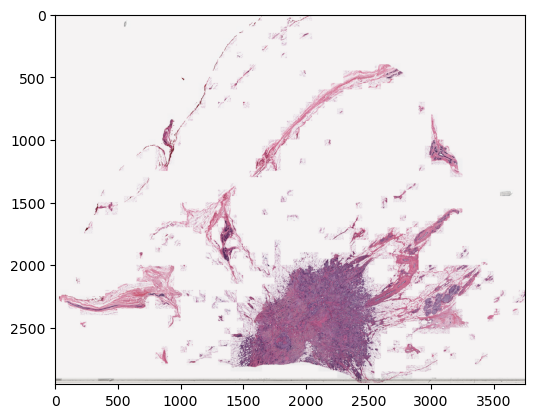

In [19]:
img_full = Image.new("RGB", (3750, 2951), color = (245, 243, 243))

ims_f = []
for i in imagens:
    ims_f.append(Image.open(i))

for i in range(len(imagens)):
    xy = imagens_coord[i].split()
    img_full.paste(ims_f[i], (int(xy[0]), int(xy[1])))
img_full.save("img_full.png")
plt.imshow(img_full)

#### Plotando a parte IDC

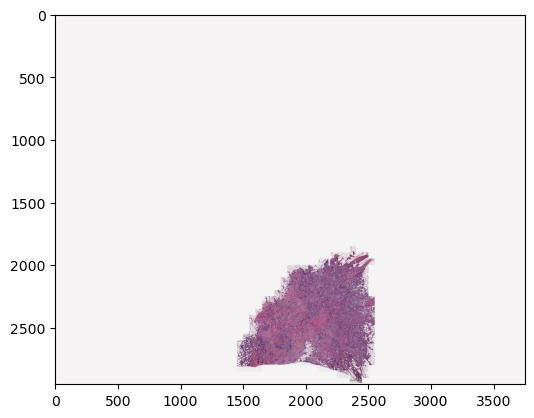

In [20]:
img_idc = Image.new("RGB", (3750, 2951), color = (245, 243, 243))

ims_idc = []
for i in idc:
    ims_idc.append(Image.open(i))

for i in range(len(idc)):
    xy = idc_coord[i].split()
    img_idc.paste(ims_idc[i], (int(xy[0]), int(xy[1])))
img_idc.save("img_idc.png")
plt.imshow(img_idc)

#### Plotando a parte não IDC

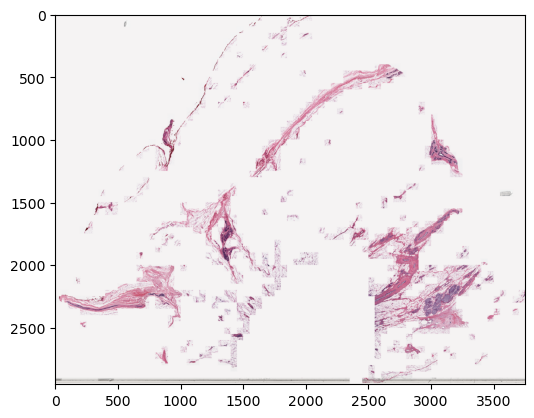

In [21]:
img_no_idc = Image.new("RGB", (3750, 2951), color = (245, 243, 243))

ims_no_idc = []
for i in no_idc:
    ims_no_idc.append(Image.open(i))

for i in range(len(no_idc)):
    xy = no_idc_coord[i].split()
    img_no_idc.paste(ims_no_idc[i], (int(xy[0]), int(xy[1])))
img_no_idc.save("img_no_idc.png")
plt.imshow(img_no_idc)

# 2 - Destacando os artefatos através de máscaras e filtro gaussiano

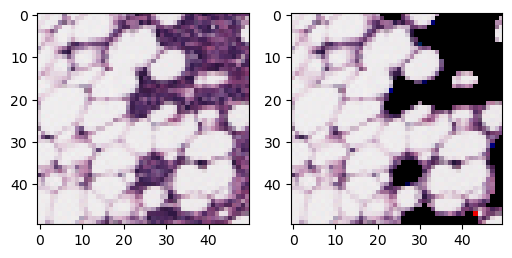

In [48]:
im = imageio.imread("1/8864_idx5_x1451_y2651_class1.png")
filt = ndi.gaussian_filter(im, sigma = 2)
mask = np.where(filt < 130, 0, im)

fig, axs = plt.subplots(1, 2, figsize = (6, 3))

axs[0].imshow(im)
axs[1].imshow(mask)

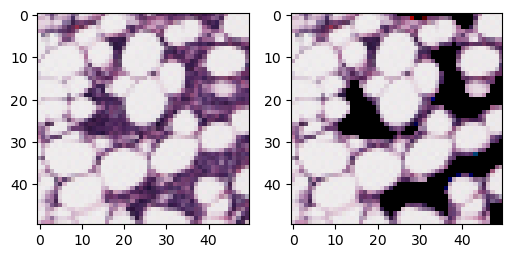

In [49]:
im = imageio.imread("1/8864_idx5_x1451_y2701_class1.png")
filt = ndi.gaussian_filter(im, sigma = 2)
mask = np.where(filt < 130, 0, im)

fig, axs = plt.subplots(1, 2, figsize = (6, 3))

axs[0].imshow(im)
axs[1].imshow(mask)

## 2.1 - Aplicando máscara em imagens que não estão datadas como cancerígenas

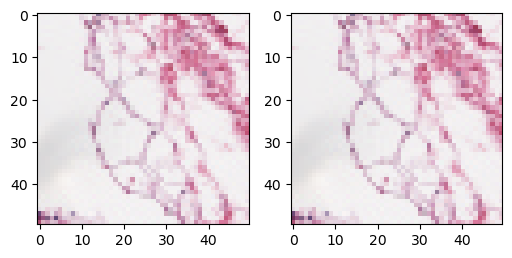

In [50]:
im = imageio.imread("0/8864_idx5_x1001_y1551_class0.png")
filt = ndi.gaussian_filter(im, sigma = 2)
mask = np.where(filt < 130, 0, im)

fig, axs = plt.subplots(1, 2, figsize = (6, 3))

axs[0].imshow(im)
axs[1].imshow(mask)

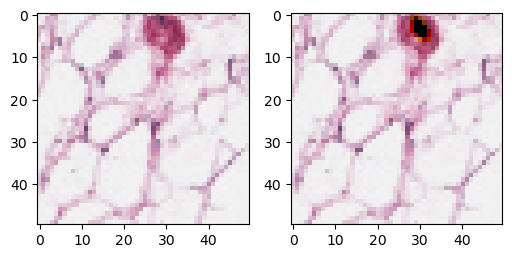

In [47]:
im = imageio.imread("0/8864_idx5_x1001_y2001_class0.png")
filt = ndi.gaussian_filter(im, sigma = 2)
mask = np.where(filt < 130, 0, im)

fig, axs = plt.subplots(1, 2, figsize = (6, 3))

axs[0].imshow(im)
axs[1].imshow(mask)

# 3 - Aplicando a máscara na imagem completa, para ver o panorama geral

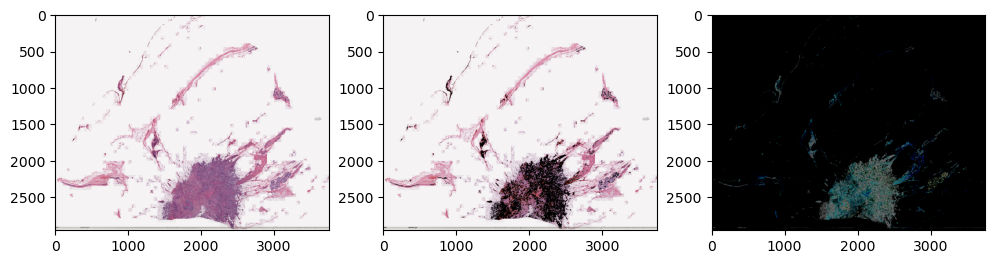

In [51]:
im = imageio.imread("img_full.png")
filt = ndi.gaussian_filter(im, sigma = 1)
mask = np.where(filt < 130, filt, 0)

filt_2 = ndi.gaussian_filter(im, sigma = 2)
mask_2 = np.where(filt_2 < 130, 0, im)

fig, axs = plt.subplots(1, 3, figsize = (12, 12))

axs[0].imshow(im)
axs[1].imshow(mask_2)
axs[2].imshow(mask)